# 7506 - Organizacion de Datos - TP1

## Dataset `train`

# 1. Librerias

Importo las librerias que voy a utilizar para el Analisis Exploratorio

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set()

plt.rc('figure', figsize=(20,10))
plt.rc('axes', titlesize=18)     
plt.rc('axes', labelsize=18)    
plt.rc('xtick', labelsize=14)    
plt.rc('ytick', labelsize=14)    
plt.rc('figure', titlesize=20)  

# 2. Importo el Dataset

Importo los Dataset´s de los .csv individuales en DataFrames individuales

In [152]:
dataset = pd.read_csv("train.csv")

# 3. Caracteristicas Generales

In [3]:
#Dimension del DataFrame

dataset.shape

(7613, 5)

In [4]:
dataset.shape[0]

7613

In [5]:
#Tamaño del DataFrame (n° filas x n°columnas)

dataset.size

38065

In [6]:
#Columnas del DataFrame

dataset.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [7]:
#Indice del DataFrame

dataset.index

RangeIndex(start=0, stop=7613, step=1)

In [8]:
#Observo las 5 primeras filas

dataset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
#Observo las 5 ultimas filas

dataset.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [10]:
#Resumen del DataFrame

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [11]:
#Observo el tipo de datos por columna

tipos = dataset.dtypes
pd.DataFrame({'Columna':tipos.index,'Tipo de dato':tipos.values})

,Columna,Tipo de dato
0,id,int64
1,keyword,object
2,location,object
3,text,object
4,target,int64


Segun se observa se tienen 2 columnas con tipo de dato 'int64' y 3 columnas 'object'

In [12]:
#Verifico si alguna de las filas esta duplicada

dataset.duplicated().sum()

0

Segun se observa no existen filas duplicadas en su totalidad

## 3.1 Analisis de NaN 

In [13]:
#Cuento la cantidad de elementos NO NULOS de cada columna

cantidad_datos = dataset.count()
cantidad_datos

id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64

Realizando una comparacion con respecto al tamaño del DataFrame (7613 filas) se observa una diferencia en la cantidad de datos en las columnas "keyword" y "location", por lo tanto se analiza la existencia de NaN

In [14]:
#Evaluo por columna la existencia o no de NaN

tiene_nulos = dataset.isnull().any()

Como se identifico previamente en las columnas "keyword" y "location" existen valores NaN

In [16]:
#Cuento la cantidad de NaN por columna

nulos = dataset.isnull().sum()
pd.DataFrame({'Columna':nulos.index,'¿Tiene NaN?':tiene_nulos.values,'Cantidad de NaN':nulos.values,'% de NaN':((nulos.values*100/dataset.shape[0])).round(1)})

,Columna,¿Tiene NaN?,Cantidad de NaN,% de NaN
0,id,False,0,0.0
1,keyword,True,61,0.8
2,location,True,2533,33.3
3,text,False,0,0.0
4,target,False,0,0.0


Segun se observa tengo una cantidad importante de NaN en la columna "location"

# 4. Analsis de caracteristicas de Columnas en forma Individual

## 4.1 Analisis de Columna N°1 `id`

La columna `id` corresponde a '*a unique identifier for each tweet*'

In [28]:
#Realizo la lectura de los valores de la columna

col_1 = dataset["id"]

In [29]:
#5 primeros valores de la columna

col_1.head()

0    1
1    4
2    5
3    6
4    7
Name: id, dtype: int64

In [30]:
#Observo si existen valores duplicados
#Si la suma da 0 significa que no existen valores duplicadas

col_1.duplicated().sum()

0

In [31]:
col_1.dtype

dtype('int64')

Segun se observa esta columna corresponde a valores enteros consecutivos comenzando desde 1

Con respecto a esta columna no tenemos otro analisis de interes para realizar

## 4.2 Analisis de Columna N°2 `keyword`

La columna `keyword` corresponde a '*a particular keyword from the tweet (may be blank)*'

In [32]:
#Valores de la columna

col_2 = dataset["keyword"]

In [33]:
#Como realize previamiente cuento la cantidad de NaN que tiene esta columna

col_2.isnull().sum()

61

Segun se observa la Cantidad de NaN en esta columna es bajo

### 4.2.1 keyword´s que mayor se repiten 

In [34]:
#Cuento la cantidad de 'Keywords' que son unicas

col_2.nunique()

221

Segun se observa la cantidad de 'keywords' unicas es baja. Veremos mas adelante si se puede considerar como un feature relevante para otro tipo de analisis

In [35]:
#Creo una nueva variable donde almaceno los valores de la columna que no son NaN
#Visualizo un ejemplo de 5 elementos

col_2_new = col_2[col_2.notnull()]
col_2_new.sample(10)

3466       exploded
1267         burned
6792        tragedy
913          bloody
7354       wildfire
6489           sunk
4589       injuries
2623    destruction
1754      collision
2505       desolate
Name: keyword, dtype: object

Se observa que alguna de las Keywords contiene caracteres del tipo %20 el cual corresponde a una referencia codificada de un espacio en blanco. Por el momento no realizaremos la limpieza

In [36]:
#Una vez que realizado el reemplazo anterior cuento la cantidad de veces que aparece una misma keyword. 

top_conteo = col_2_new.value_counts().reset_index()
top_conteo.columns = ['Keyword', 'Cantidad']
top_conteo.head()

,Keyword,Cantidad
0,fatalities,45
1,armageddon,42
2,deluge,42
3,sinking,41
4,harm,41


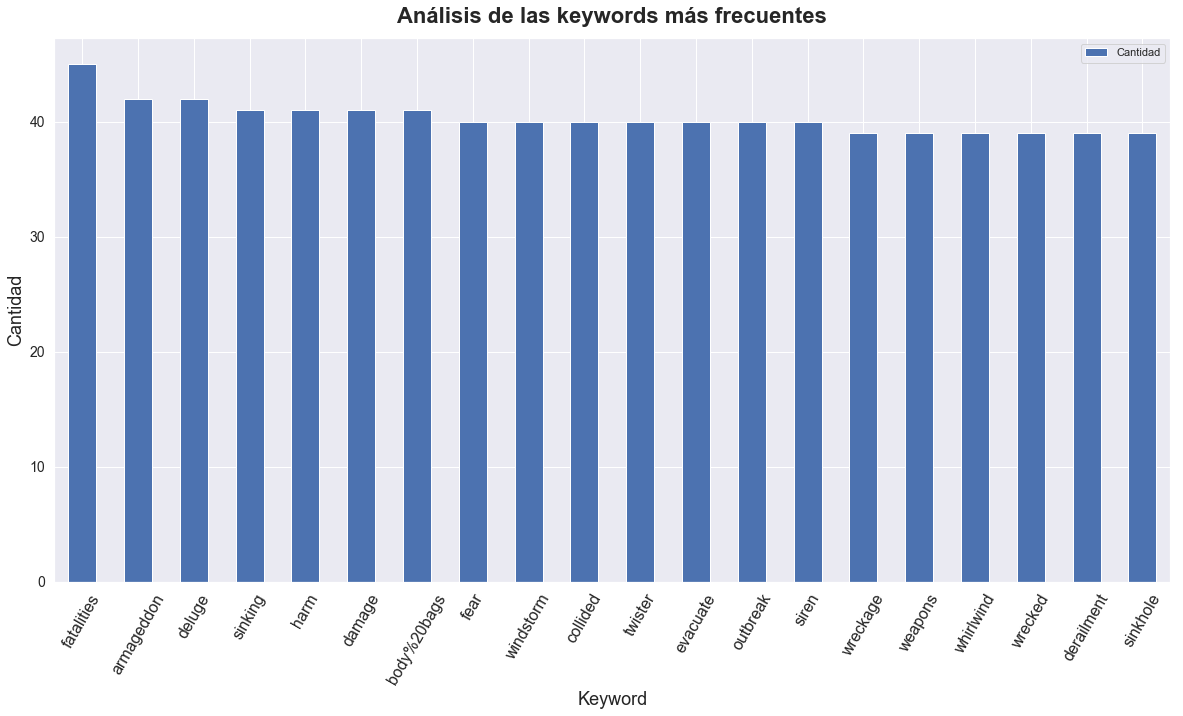

In [37]:
#Grafico de Barras Verticales

fig, ax = plt.subplots(figsize=(20,10))

top_conteo.nlargest(20,'Cantidad').plot(kind='bar', x = 'Keyword', ax = ax)

plt.xlabel("Keyword",fontsize=18)
plt.ylabel('Cantidad',fontsize=18)
plt.xticks(fontsize=16,rotation = 60) 
plt.title('Análisis de las keywords más frecuentes',fontsize=22,fontweight='bold', pad = 15)
plt.show()

In [38]:
porcentaje_20 = col_2_new[col_2_new.str.contains('%20')]
top_conteo_20 = porcentaje_20.value_counts().reset_index()
top_conteo_20.columns = ['Keyword con %20', 'Cantidad']
top_conteo_20.head()

,Keyword con %20,Cantidad
0,body%20bags,41
1,oil%20spill,38
2,burning%20buildings,37
3,cliff%20fall,36
4,dust%20storm,36


Text(0.5, 1.0, 'Análisis de las keywords con %20 más frecuentes')

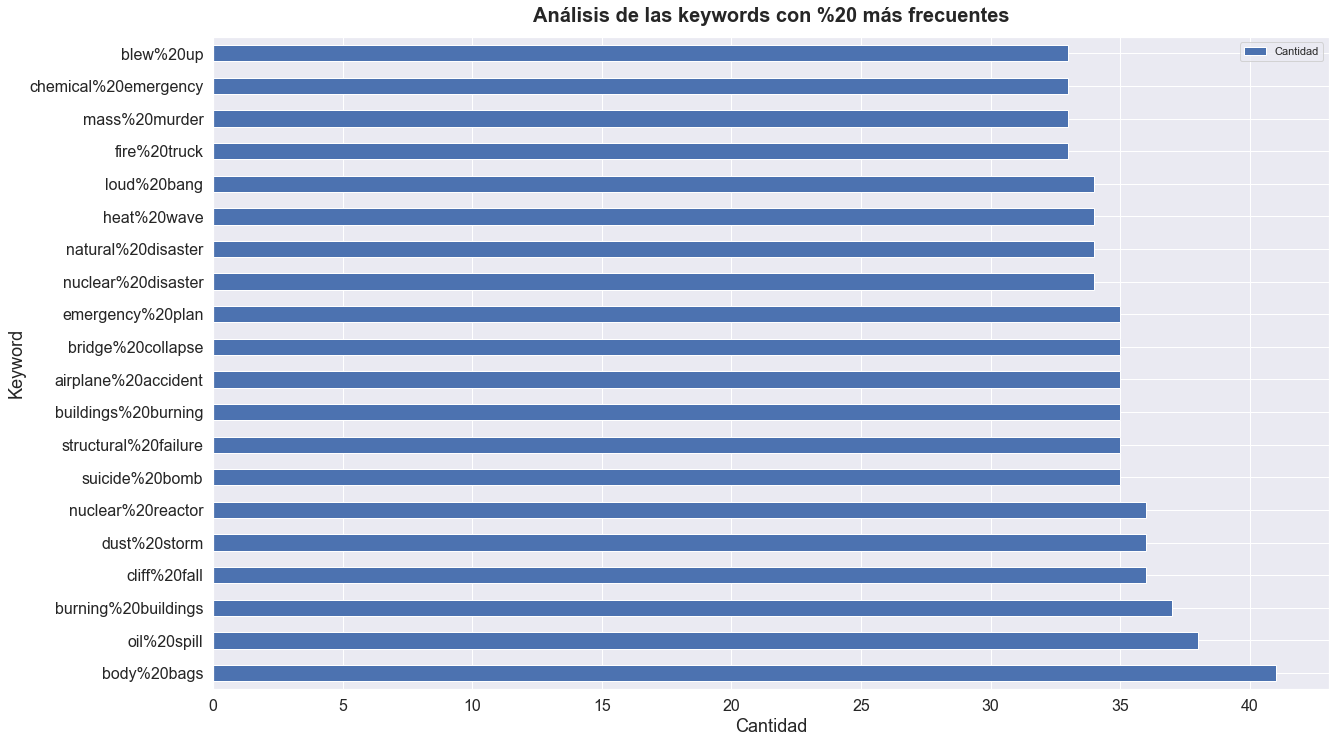

In [39]:
#Grafico de Barras Horizontales

fig, ax = plt.subplots(figsize=(20,12))

top_conteo_20.nlargest(20,'Cantidad').plot(kind='barh', x = 'Keyword con %20', ax = ax)

plt.xlabel("Cantidad",fontsize=18)
plt.ylabel('Keyword',fontsize=18)
plt.yticks(fontsize=16,rotation = 0)
plt.xticks(fontsize=16) 
plt.title('Análisis de las keywords con %20 más frecuentes',fontsize=20,fontweight='bold', pad = 15)

### 4.2.2 Largo de  keyword´s - Cantidad de caracteres

In [40]:
#Calculo la longitud de cada Keyword

col_2_largo_caracteres = col_2_new.str.len()

In [41]:
#Obtengo los estadisticos principales de la longitus de los Keyword

col_2_estadisticos = col_2_largo_caracteres.describe()
pd.DataFrame({'Estadistico':col_2_estadisticos.index,'Valor':(col_2_estadisticos.values).round(1)})

,Estadistico,Valor
0,count,7552.0
1,mean,8.7
2,std,3.5
3,min,4.0
4,25%,6.0
5,50%,8.0
6,75%,10.0
7,max,21.0


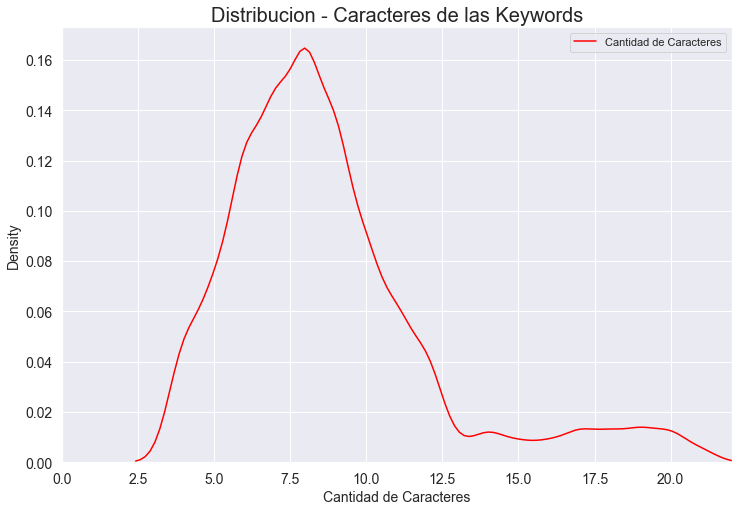

In [45]:
#Grafico las distribuciones del largo de Keyword - KDE

fig,ax1 = plt.subplots(1,figsize=(12,8))

ax1 = sns.kdeplot(col_2_largo_caracteres,color='red',label='Cantidad de Caracteres')
ax1.set_title('Distribucion - Caracteres de las Keywords',fontsize=20)
ax1.set_xlim(0,22)
ax1.set_xlabel('Cantidad de Caracteres',fontsize=14)
ax1.set_ylabel('Density',fontsize=14)
plt.show()

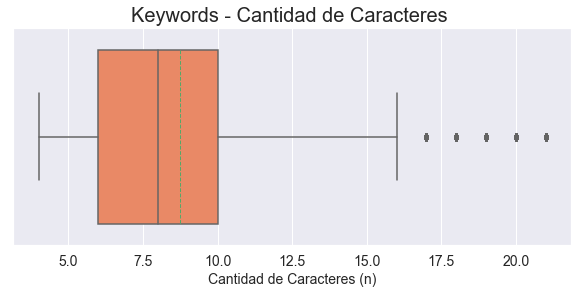

In [46]:
#Grafico las distribuciones del largo de Keyword - Boxplot - Opcion N°1

fig,ax1 = plt.subplots(1,figsize=(10,4))

ax1 = sns.boxplot(col_2_largo_caracteres.values,color='coral',meanline=True,showmeans=True)
ax1.set_title('Keywords - Cantidad de Caracteres ', fontsize=20)
ax1.set_xlabel("Cantidad de Caracteres (n)", fontsize=14)
plt.show()

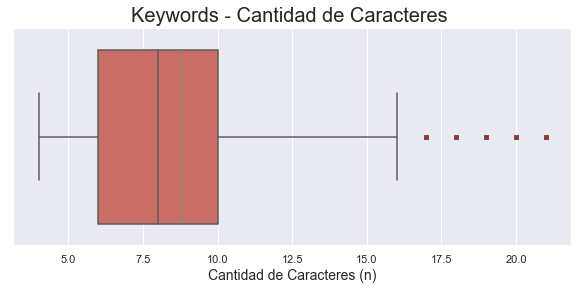

In [19]:
#Grafico las distribuciones del largo de Keyword - Boxplot - Opcion N°1

fig,ax1 = plt.subplots(1,figsize=(10,4))
ax1 = sns.boxplot(col_2_largo_caracteres.values,palette="hls",flierprops=outliers,meanline=True,showmeans=True,showfliers=True)
ax1.set_title('Keywords - Cantidad de Caracteres', fontsize=20)
ax1.set_xlabel("Cantidad de Caracteres (n)", fontsize=14)
plt.show()

In [47]:
from matplotlib.gridspec import GridSpec

Text(0.5, 0, 'Cantidad de Caracteres (n)')

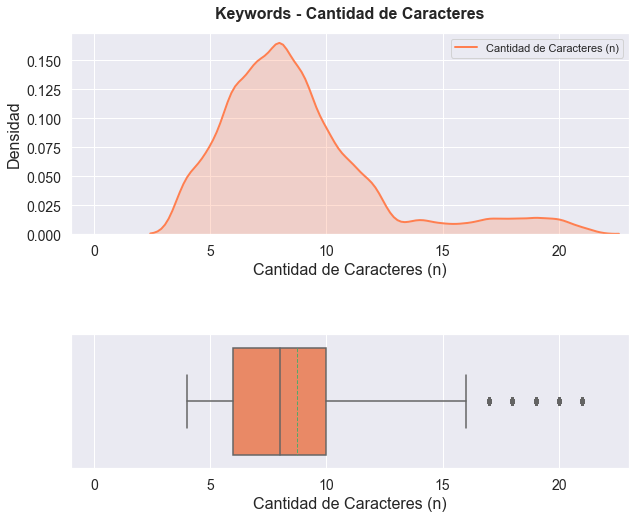

In [50]:
#Grafico las distribuciones del largo de Keyword - Opcion Final

x_lim = col_2_largo_caracteres.max()+2
fig = plt.figure(figsize=(10,8))
gs = GridSpec(2, 1, height_ratios=[6,4], hspace=0.6)


ax = plt.subplot(gs[0])

sns.distplot(col_2_largo_caracteres, hist = False, kde = True, ax = ax, color = 'coral', kde_kws = {'shade': True, 'linewidth': 2}, label = "Cantidad de Caracteres (n)")
plt.xlim(-1, x_lim)
plt.ylabel('Densidad',fontsize=16)
plt.title('Keywords - Cantidad de Caracteres',fontsize=16,fontweight='bold', pad = 15)
plt.xlabel("Cantidad de Caracteres (n)",fontsize=16)
plt.legend()


ax1 = plt.subplot(gs[1])

sns.boxplot(col_2_largo_caracteres, color='coral', ax=ax1, orient='h',meanline=True,showmeans=True)
plt.xlim(-1, x_lim)
plt.xlabel("Cantidad de Caracteres (n)",fontsize=16)

### ¿Los outliers del Boxpot son debido a keywords que incluyen el simbolo %20? 

In [51]:
#Me quedo con aquellos keywords que NO tienen el simbolo %20

notiene_porcentaje20 = col_2_new.drop(col_2_new[col_2_new.str.contains('%20')].index)

In [52]:
#Calculo el largo de aquellas keywords que NO tienen el simbolo %20

largo_notiene_porcentaje20 = notiene_porcentaje20.str.len()

In [53]:
#Me quedo con aquellos keywords que tienen el simbolo %20

tiene_porcentaje20 = col_2_new[col_2_new.str.contains('%20')]

In [54]:
#Calculo el largo de aquellas keywords que tienen el simbolo %20

largo_tiene_porcentaje20 = tiene_porcentaje20.str.len()

In [55]:
pd.DataFrame({'Estadisticos':largo_notiene_porcentaje20.describe().index,'Keyword que NO tiene %20':(largo_notiene_porcentaje20.describe().values).round(1),'Keyword que tiene %20':(largo_tiene_porcentaje20.describe().values).round(1)})

,Estadisticos,Keyword que NO tiene %20,Keyword que tiene %20
0,count,6387.0,1165.0
1,mean,7.6,14.9
2,std,2.0,3.5
3,min,4.0,9.0
4,25%,6.0,12.0
5,50%,8.0,14.0
6,75%,9.0,18.0
7,max,12.0,21.0


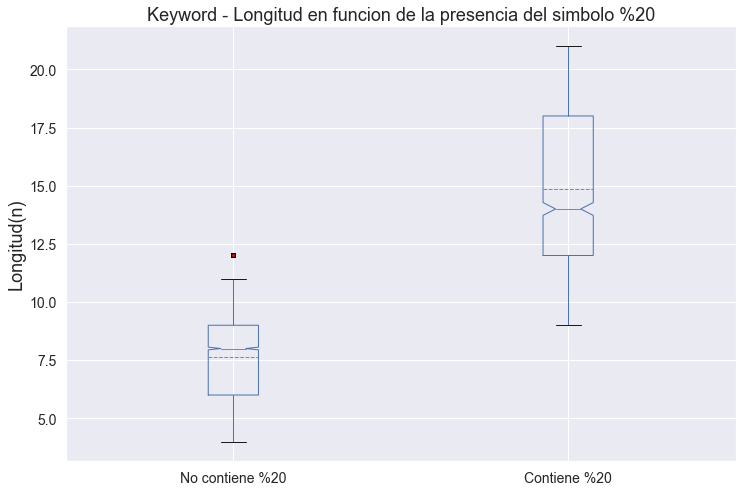

In [56]:
#Grafico los boxplot's de las keywords que poseen %20 y las que no lo poseen - Opcion N°1

datos = pd.DataFrame({'No contiene %20':largo_notiene_porcentaje20,'Contiene %20':largo_tiene_porcentaje20})
outliers = dict(marker='o', markerfacecolor='red', markersize=4,
                  linestyle='none')

fig,(ax1) = plt.subplots(figsize=(12,8))
ax1.set_title('Keyword - Longitud en funcion de la presencia del simbolo %20',fontsize=18)
ax1.set_ylabel('Longitud(n)')
datos.plot.box(ax=ax1,notch=True,flierprops=outliers, whis=0.75,meanline=True,showmeans=True,showfliers=True)
plt.show()

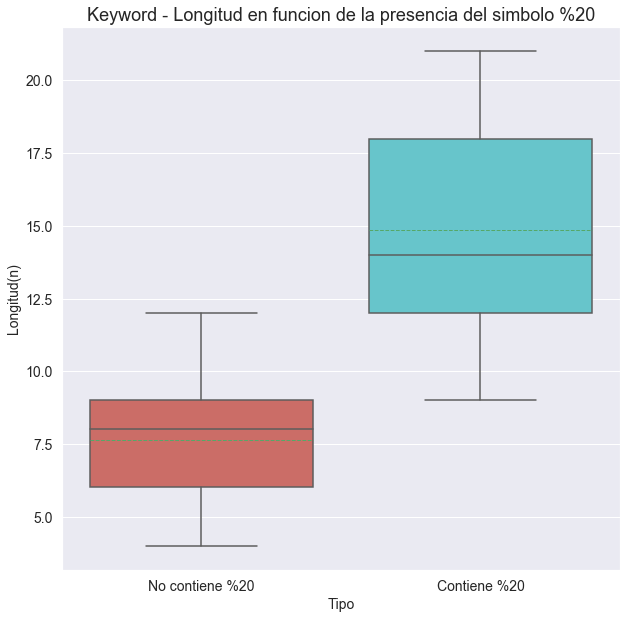

In [57]:
#Grafico los boxplot's de las keywords que poseen %20 y las que no lo poseen - Opcion N°2

datos = pd.DataFrame({'No contiene %20':largo_notiene_porcentaje20,'Contiene %20':largo_tiene_porcentaje20})

fig,(ax1) = plt.subplots(figsize=(10,10))
ax1.set_title('Keyword - Longitud en funcion de la presencia del simbolo %20',fontsize=18)
ax1.set_ylabel('Longitud(n)',fontsize=14)
ax1.set_xlabel('Tipo',fontsize=14)
sns.boxplot(data=datos,palette="hls",meanline=True,showmeans=True,ax=ax1)
plt.show()

Text(0.5, 0, 'Cantidad de caracteres(n)')

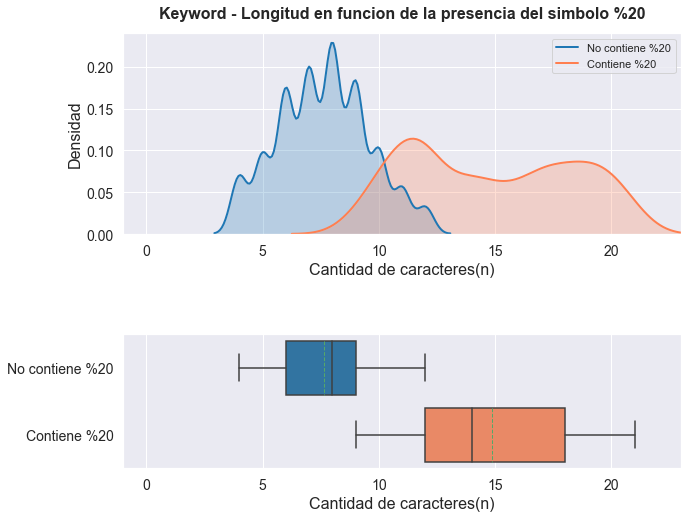

In [59]:
#Grafico las distribuciones para Target 0 y 1 - Opcion Final

datos = pd.DataFrame({'No contiene %20':largo_notiene_porcentaje20,'Contiene %20':largo_tiene_porcentaje20})

x_lim = datos['Contiene %20'].max()+2
fig = plt.figure(figsize=(10,8))
gs = GridSpec(2, 1, height_ratios=[6,4], hspace=0.6)


ax = plt.subplot(gs[0])

sns.distplot(datos['No contiene %20'], hist = False, kde = True, ax = ax, color = '#1f77b4', kde_kws = {'shade': True, 'linewidth': 2}, label = 'No contiene %20')
sns.distplot(datos['Contiene %20'], hist = False, kde = True, ax = ax, color = 'coral', kde_kws = {'shade': True, 'linewidth': 2}, label = 'Contiene %20')

plt.xlim(-1, x_lim)
plt.ylabel('Densidad',fontsize=16)
plt.title('Keyword - Longitud en funcion de la presencia del simbolo %20',fontsize=16,fontweight='bold', pad = 15)
plt.xlabel('Cantidad de caracteres(n)',fontsize=16)
plt.legend()


ax1 = plt.subplot(gs[1])


data = datos.loc[:,['No contiene %20','Contiene %20']]
colors = ('#1f77b4' , 'coral')
sns.boxplot(data=data, palette=colors, ax=ax1, orient='h',meanline=True,showmeans=True)
plt.xlim(-1, x_lim)
plt.xlabel('Cantidad de caracteres(n)',fontsize=16)

### 4.2.3 Largo de  keyword´s - Cantidad de Palabras

In [60]:
#Para cada tweet cuento la cantidad de palabras

col_2_largo_palabras = col_2_new.str.split().map(lambda x: len(x))
col_2_largo_palabras.head()

31    1
32    1
33    1
34    1
35    1
Name: keyword, dtype: int64

In [61]:
col_2_largo_palabras.describe()

count    7552.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: keyword, dtype: float64

Como era de esperarse la cantidad de palabras por keyword corresponde a 1 ya que es la caracteristica que debe cumplir

¿Que pasaria con la longitud de palabras para aquellas keywords del tipo `body%20bags` que pareciera tener mas de 1 palabra cuando retiramos el %20?

## 4.3 Analisis de Columna N°3 `location`

La columna `location` corresponde a *the location the tweet was sent from (may be blank)*

In [62]:
#Valores de la columna

col_3 = dataset["location"]

In [63]:
col_3.sample(20)

4079                             NaN
7304    Toronto, Bob-Lo, Miami Beach
406                Jerusalem, Israel
6681                             NaN
1017                            EPTX
6581             Lake Monticello, VA
97                    Hagerstown, MD
2875                   austin, texas
306                 #FLIGHTCITY UK  
1724               Lansing, Michigan
1564                 London, England
861                              NaN
4597                             NaN
5135      Johannesburg, South Africa
3641          St. John's, NL, Canada
4016                             NaN
1820            52.479722, 62.184971
6573              SÌ£o Paulo, Brasil
4731                              LA
863                              NaN
Name: location, dtype: object

### 4.3.1 Analisis de NaN

In [64]:
#Como realize previamiente cuento la cantidad de NaN que tiene esta columna

col_3.isnull().sum()

2533

Segun se observa la cantidad de nulos que tiene esta columna es considerable

In [65]:
#Cuento la cantidad de valores que NO son NaN

col_3.notnull().sum()

5080

In [66]:
#Creo un DataFrame con los valores anteriores NaN y NO NaN

col_3_df = pd.DataFrame({'Tipo':['Nulo', 'No Nulo'], 'Cantidad':[col_3.isnull().sum(), col_3.notnull().sum()]})
col_3_df

,Tipo,Cantidad
0,Nulo,2533
1,No Nulo,5080


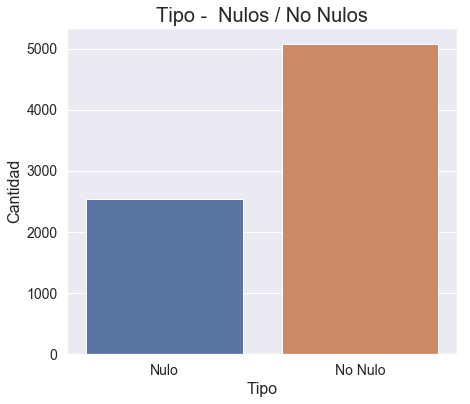

In [67]:
#Realizo un grafico comparativo entre los valores

fig,ax1 = plt.subplots(figsize=(7,6))

ax1 = sns.barplot(x = col_3_df['Tipo'], y = col_3_df['Cantidad'])
ax1.set_title("Tipo -  Nulos / No Nulos", fontsize=20)
ax1.set_xlabel("Tipo", fontsize=16)
ax1.set_ylabel("Cantidad", fontsize=16)
plt.show()

In [68]:
#Cantidad de lugares unicos

col_3.nunique()

3341

Los lugares no son generados en forma automatica, son entradas generadas por el Usuario que redacta el tweet. Por este motivo se observa que estos textos se encuentran 'sucios' (algunos tienen doble lugar) y la cantidad de unicos es muy grande

### 4.3.2 Analisis de Lugares con mayor aparicion

In [69]:
#Cuento la cantidad de veces que aparece una mismo locacion
#Observo a modo de ejemplo los 20 primeros

col_3_sumas = col_3.value_counts()
col_3_sumas.head(20)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Australia           18
Chicago, IL         18
California          17
New York, NY        15
Everywhere          15
California, USA     15
Florida             14
Name: location, dtype: int64

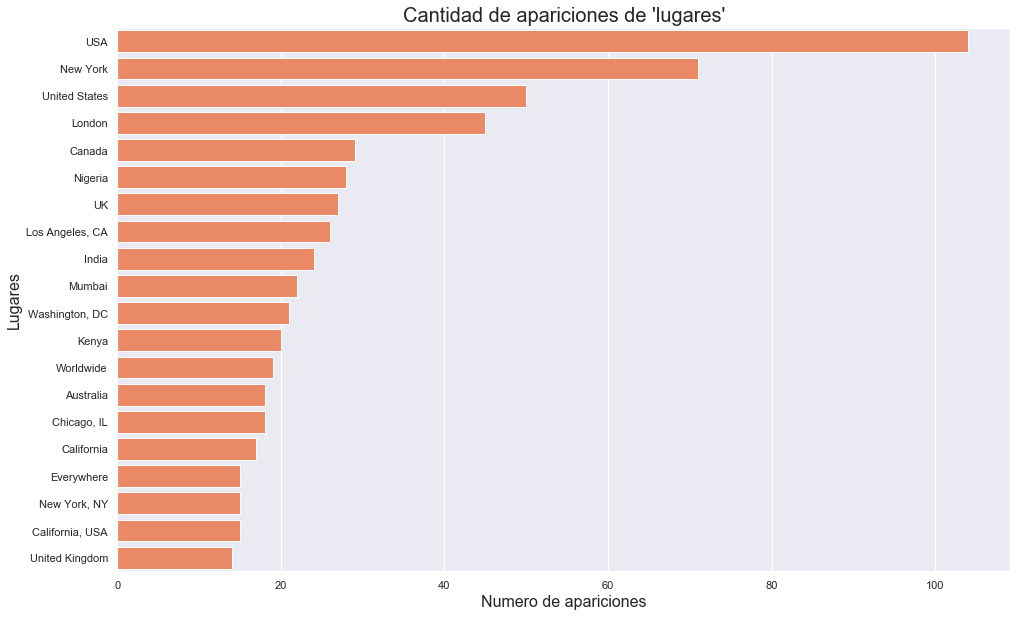

In [96]:
#Grafico los lugares con mayor aparicion

fig,ax1 = plt.subplots(figsize=(16,10))
ax1 = sns.barplot(x = col_3_sumas.head(20).values, y =col_3_sumas.head(20).index, color='coral')
ax1.set_title("Cantidad de apariciones de 'lugares'", fontsize=20)
ax1.set_xlabel("Numero de apariciones", fontsize=16)
ax1.set_ylabel("Lugares", fontsize=16)
plt.show()

A simple vista se observa que tenemos registros del tipo `USA`, `New York`, `United States` y otros tantos que hacen pensar que los lugares no se encuentran univocamente identificados.

A modo de ejemplo construyo una funcion `conteo (n)` que toma como parametro un entero n (n primeros strings con mayores apariciones)  y cuenta la cantidad de veces que ese texto especifico aparece dentro de un string en una ubicacion cualquiera

In [70]:
def conteo(n):
    lista_1 = []
    lista_2 = []
    for i in col_3.value_counts().head(n).index:
        suma = col_3.str.contains(i).sum()
        lista_1.append(i)
        lista_2.append(suma)
    df = pd.DataFrame({'Lugar':lista_1,'Cantidad de Apariciones':lista_2})
    return df

In [71]:
c = conteo(20)
c

,Lugar,Cantidad de Apariciones
0,USA,260
1,New York,131
2,United States,62
3,London,108
4,Canada,80
5,Nigeria,55
6,UK,91
7,"Los Angeles, CA",26
8,India,58
9,Mumbai,31


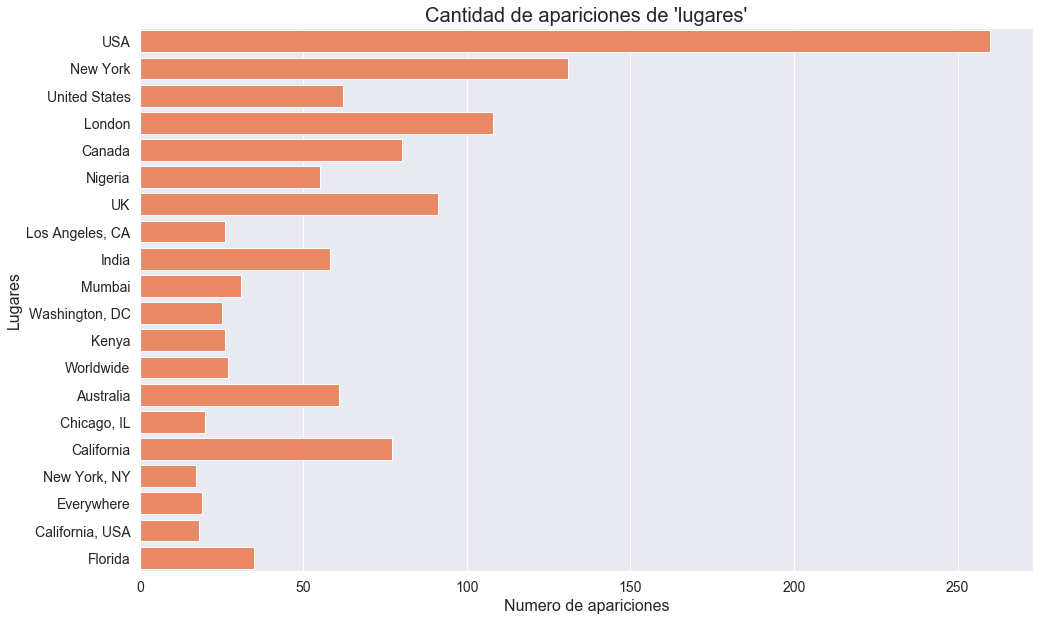

In [72]:
#Grafico los valores de mayor aparicion multiple

fig,ax1 = plt.subplots(figsize=(16,10))
ax1 = sns.barplot(x = c['Cantidad de Apariciones'], y =c['Lugar'], color='coral')
ax1.set_title("Cantidad de apariciones de 'lugares'", fontsize=20)
ax1.set_xlabel("Numero de apariciones", fontsize=16)
ax1.set_ylabel("Lugares", fontsize=16)
plt.show()

Para observar en forma grafica las diferencias encontradas realizo un grafico de Barras acompladas de los dos anteriores

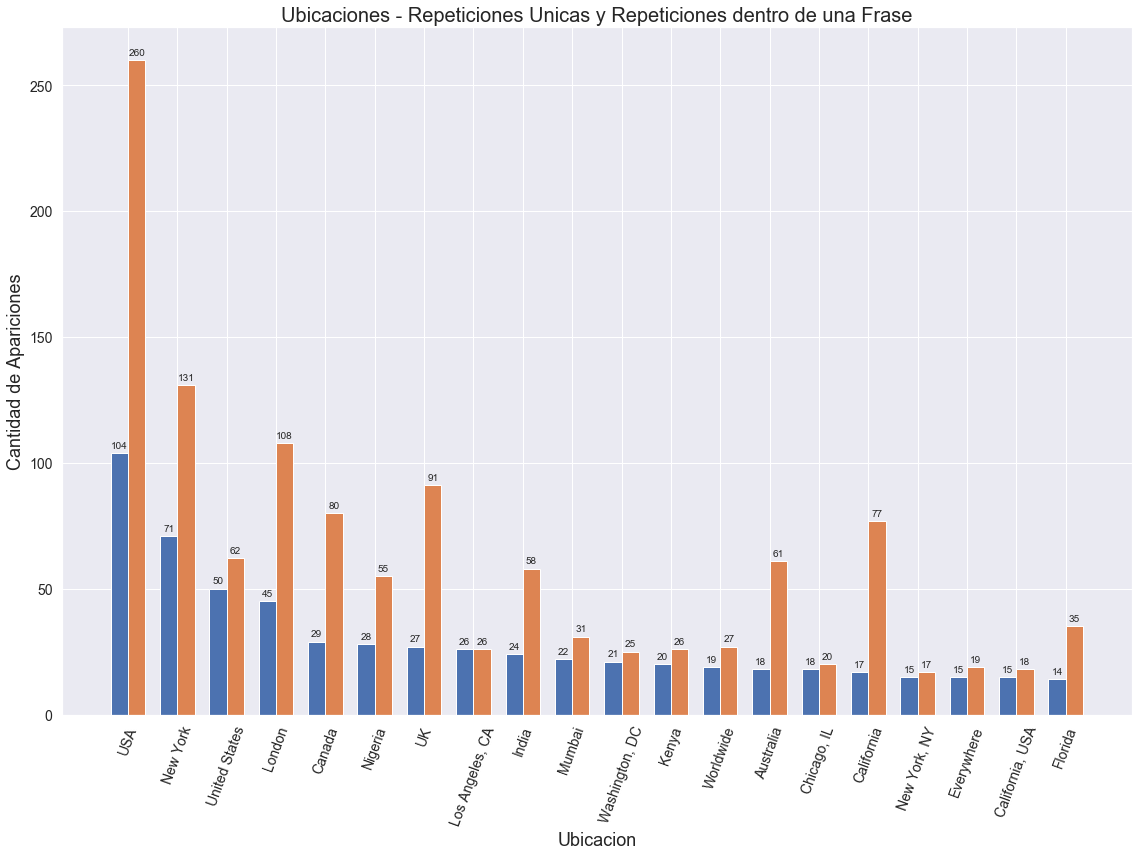

In [73]:
#Realizo un Barplot acoplado

labels = c['Lugar']
repeticion_unica = col_3_sumas.head(20).values
repeticion_en_frase = c['Cantidad de Apariciones']

x = np.arange(len(labels)) 
width = 0.35

fig, ax = plt.subplots(figsize=(16,12))
rep1 = ax.bar(x - width/2, repeticion_unica, width, label='Repeticion Unica')
rep2 = ax.bar(x + width/2, repeticion_en_frase, width, label='Repeciones dentro de una Frase')

ax.set_ylabel('Cantidad de Apariciones',fontsize=18)
ax.set_xlabel('Ubicacion',fontsize=18)
ax.set_title('Ubicaciones - Repeticiones Unicas y Repeticiones dentro de una Frase',fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=14,rotation = 70)


def etiquetado(rep):
    for i in rep:
        height = i.get_height()
        ax.annotate('{}'.format(height),
                    xy=(i.get_x() + i.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')


etiquetado(rep1)
etiquetado(rep2)

fig.tight_layout()

plt.show()

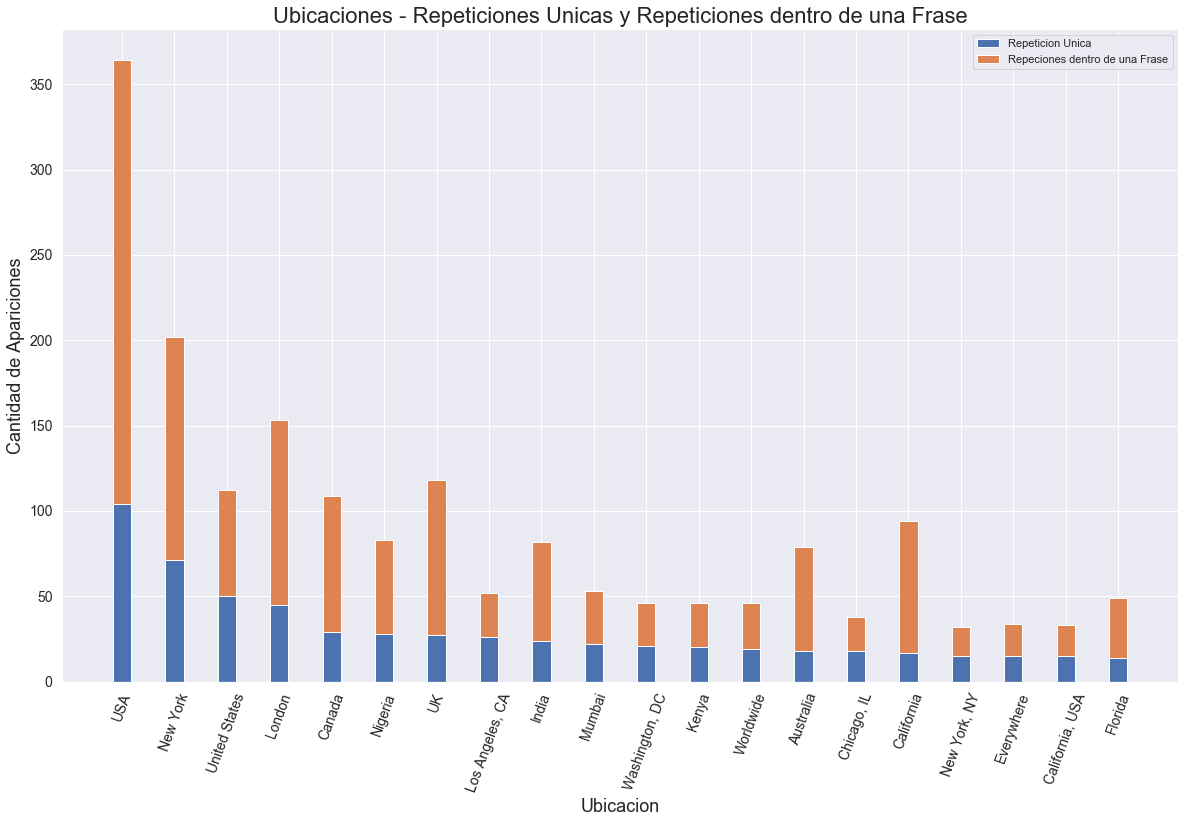

In [77]:
#Realizo el mismo grafico pero "stacked"

labels = c['Lugar']
repeticion_unica = col_3_sumas.head(20).values
repeticion_en_frase = c['Cantidad de Apariciones']

x = np.arange(len(labels)) 


width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(20,12))

ax.bar(labels, repeticion_unica , width, label='Repeticion Unica')
ax.bar(labels, repeticion_en_frase, width, repeticion_unica,
       label='Repeciones dentro de una Frase')

ax.set_ylabel('Cantidad de Apariciones',fontsize=18)
ax.set_xlabel('Ubicacion',fontsize=18)
ax.set_title('Ubicaciones - Repeticiones Unicas y Repeticiones dentro de una Frase',fontsize=22)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=14,rotation = 70)

ax.legend()

plt.show()

In [78]:
#Si quiereo analizar las repeticiones de un lugar en particular puedo utilizar lo siguiente:

pd.DataFrame({'Keyword que contiene USA':col_3[col_3.str.contains('USA') == True].value_counts().head(10).index,'Cantidad':col_3[col_3.str.contains('USA') == True].value_counts().head(10).values})


,Keyword que contiene USA,Cantidad
0,USA,104
1,"California, USA",15
2,"Pennsylvania, USA",7
3,"Florida, USA",5
4,"Texas, USA",5
5,"New York, USA",5
6,"Massachusetts, USA",4
7,"North Carolina, USA",4
8,"Illinois, USA",3
9,"Hawaii, USA",3


## 4.4 Analisis de Columna N°4 `text`

La columna `text` corresponde a *the text of the tweet* 

In [79]:
col_4 = dataset["text"]
col_4.head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

### 4.4.1 Analisis de cantidad de Caracteres

In [80]:
#Para cada tweet cuento la cantidad de Caracteres

largo_caracteres = col_4.str.len()
largo_caracteres.head()

0     69
1     38
2    133
3     65
4     88
Name: text, dtype: int64

In [81]:
pd.DataFrame({'Estadistico':largo_caracteres.describe().index,'Valor':(largo_caracteres.describe().values).round(1)})

,Estadistico,Valor
0,count,7613.0
1,mean,101.0
2,std,33.8
3,min,7.0
4,25%,78.0
5,50%,107.0
6,75%,133.0
7,max,157.0


C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


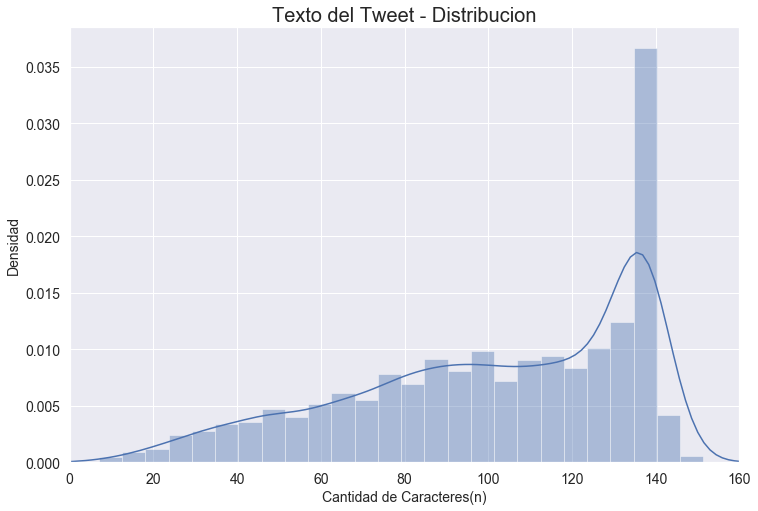

In [82]:
#Grafico la Distribucion - Opcion N°1

fig,ax1 = plt.subplots(figsize=(12,8))

ax1.set_title('Texto del Tweet - Distribucion',fontsize=20)
ax1.set_xlabel('Cantidad de Caracteres(n)',fontsize=14)
ax1.set_ylabel('Densidad',fontsize=14)
ax1.set_xlim(0,160)
sns.distplot(largo_caracteres.values)
plt.show()

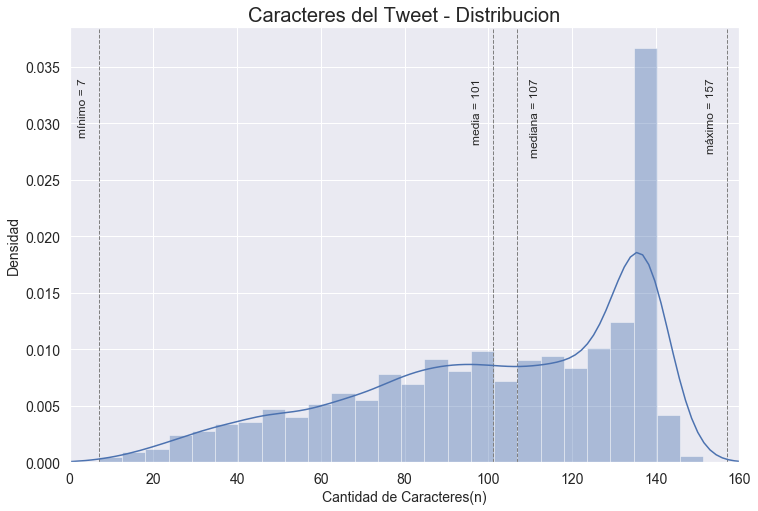

In [83]:
#Grafico la Distribucion - Opcion N°2

fig,ax1 = plt.subplots(figsize=(12,8))

min_len = largo_caracteres.min()
mean_len = largo_caracteres.mean()
median_len = largo_caracteres.median()
max_len = largo_caracteres.max()

ax1.axvline(mean_len, color='grey', linestyle='--', linewidth=1)
ax1.axvline(median_len, color='grey', linestyle='--', linewidth=1)
ax1.axvline(min_len, color='grey', linestyle='--', linewidth=1)
ax1.axvline(max_len, color='grey', linestyle='--', linewidth=1)

plt.text(min_len - 5 , ax1.get_ylim()[1]/30, 'mínimo = %d' %min_len, rotation = 90, fontsize = 12)
plt.text(mean_len - 5 , ax1.get_ylim()[1]/30, 'media = %d' %mean_len, rotation = 90, fontsize = 12)
plt.text(median_len + 3 , ax1.get_ylim()[1]/30, 'mediana = %d' %median_len, rotation = 90, fontsize = 12)
plt.text(max_len - 5 , ax1.get_ylim()[1]/30, 'máximo = %d' %max_len, rotation = 90, fontsize = 12)

ax1.set_title('Caracteres del Tweet - Distribucion',fontsize=20)
ax1.set_xlabel('Cantidad de Caracteres(n)',fontsize=14)
ax1.set_ylabel('Densidad',fontsize=14)
ax1.set_xlim(0,160)
sns.distplot(largo_caracteres.values)
plt.show()

Text(0.5, 0, 'Cantidad de Caracteres (n)')

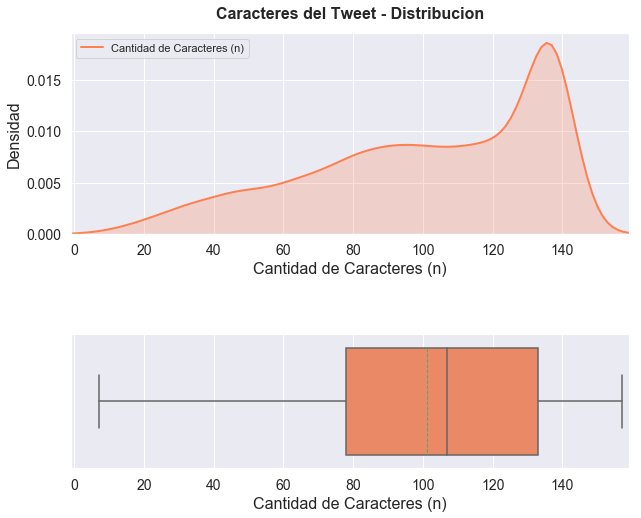

In [84]:
#Grafico la Distribucion - Opcion Final

x_lim = largo_caracteres.max()+2


fig = plt.figure(figsize=(10,8))

gs = GridSpec(2, 1, height_ratios=[6,4], hspace=0.6)


ax = plt.subplot(gs[0])

sns.distplot(largo_caracteres, hist = False, kde = True, ax = ax, color = 'coral',
                 kde_kws = {'shade': True, 'linewidth': 2}, label = "Cantidad de Caracteres (n)")

plt.xlim(-1, x_lim)
plt.ylabel('Densidad',fontsize=16)
plt.title('Caracteres del Tweet - Distribucion',fontsize=16,fontweight='bold', pad = 15)
plt.xlabel("Cantidad de Caracteres (n)",fontsize=16)
plt.legend()


ax1 = plt.subplot(gs[1])

sns.boxplot(largo_caracteres, color='coral', ax=ax1, orient='h',meanline=True,showmeans=True)


plt.xlim(-1, x_lim)
plt.xlabel("Cantidad de Caracteres (n)",fontsize=16)

### 4.4.2 Analisis cantidad de Palabras 

In [85]:
#Para cada tweet cuento la cantidad de palabras

largo_palabras = col_4.str.split().map(lambda x: len(x))
largo_palabras.head()

0    13
1     7
2    22
3     8
4    16
Name: text, dtype: int64

In [86]:
pd.DataFrame({'Estadistico':largo_palabras.describe().index,'Valor':(largo_palabras.describe().values).round(1)})

,Estadistico,Valor
0,count,7613.0
1,mean,14.9
2,std,5.7
3,min,1.0
4,25%,11.0
5,50%,15.0
6,75%,19.0
7,max,31.0


C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


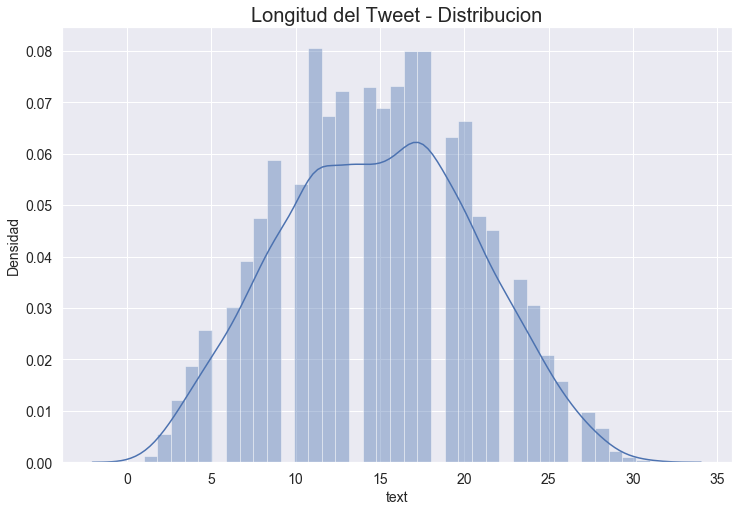

In [87]:
#Grafico la distribucion - Opcion N°1

fig,(ax1) = plt.subplots(figsize=(12,8))

ax1.set_title('Longitud del Tweet - Distribucion',fontsize=20)
ax1.set_xlabel('Longitud',fontsize=14)
ax1.set_ylabel('Densidad',fontsize=14)
sns.distplot(largo_palabras)
plt.show()

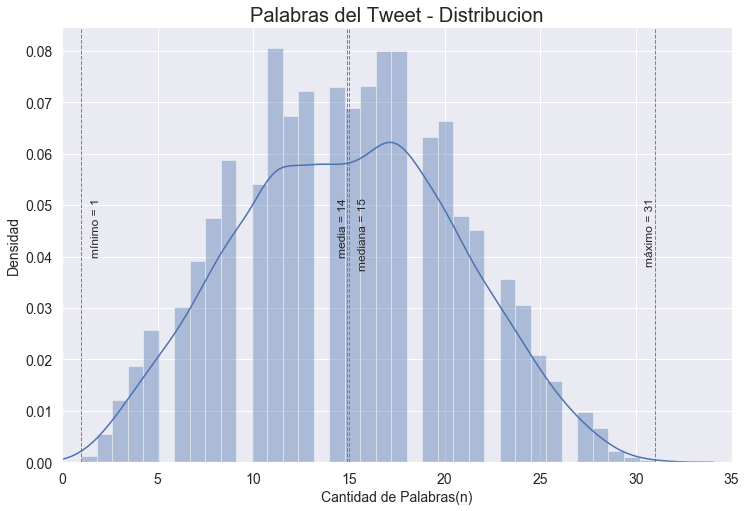

In [88]:
#Grafico la Distribucion - Opcion N°2

fig,ax1 = plt.subplots(figsize=(12,8))

min_len = largo_palabras.min()
mean_len = largo_palabras.mean()
median_len = largo_palabras.median()
max_len = largo_palabras.max()

ax1.axvline(mean_len, color='grey', linestyle='--', linewidth=1)
ax1.axvline(median_len, color='grey', linestyle='--', linewidth=1)
ax1.axvline(min_len, color='grey', linestyle='--', linewidth=1)
ax1.axvline(max_len, color='grey', linestyle='--', linewidth=1)

plt.text(min_len + 0.5 , ax1.get_ylim()[1]/20, 'mínimo = %d' %min_len, rotation = 90, fontsize = 12)
plt.text(mean_len - 0.5 , ax1.get_ylim()[1]/20, 'media = %d' %mean_len, rotation = 90, fontsize = 12)
plt.text(median_len + 0.5 , ax1.get_ylim()[1]/20, 'mediana = %d' %median_len, rotation = 90, fontsize = 12)
plt.text(max_len - 0.5 , ax1.get_ylim()[1]/20, 'máximo = %d' %max_len, rotation = 90, fontsize = 12)

ax1.set_title('Palabras del Tweet - Distribucion',fontsize=20)
ax1.set_xlabel('Cantidad de Palabras(n)',fontsize=14)
ax1.set_ylabel('Densidad',fontsize=14)
ax1.set_xlim(0,35)
sns.distplot(largo_palabras.values)
plt.show()

Text(0.5, 0, 'Cantidad de Palabras (n)')

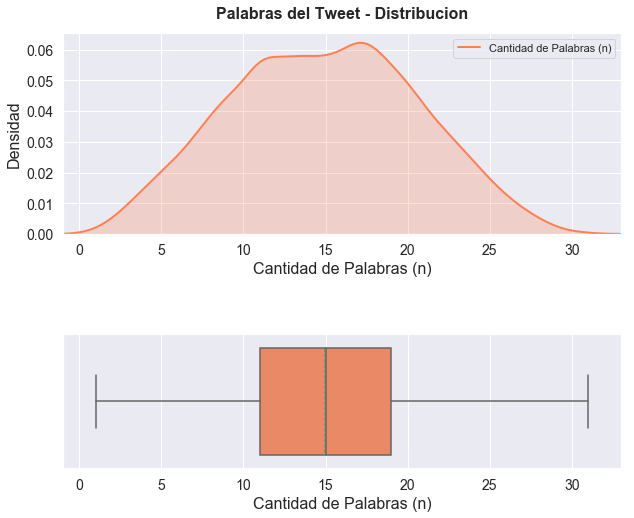

In [89]:
#Grafico la Distribucion - Opcion N°3

x_lim = largo_palabras.max()+2

fig = plt.figure(figsize=(10,8))

gs = GridSpec(2, 1, height_ratios=[6,4], hspace=0.6)


ax = plt.subplot(gs[0])

sns.distplot(largo_palabras, hist = False, kde = True, ax = ax, color = 'coral',kde_kws = {'shade': True, 'linewidth': 2}, label = "Cantidad de Palabras (n)")

plt.xlim(-1, x_lim)
plt.ylabel('Densidad',fontsize=16)
plt.title('Palabras del Tweet - Distribucion',fontsize=16,fontweight='bold', pad = 15)
plt.xlabel("Cantidad de Palabras (n)",fontsize=16)
plt.legend()


ax1 = plt.subplot(gs[1])

sns.boxplot(largo_palabras, color='coral', ax=ax1, orient='h',meanline=True,showmeans=True)


plt.xlim(-1, x_lim)
plt.xlabel("Cantidad de Palabras (n)",fontsize=16)

### 4.4.3 Analisis cantidad de Palabras unicas

In [90]:
largo_palabras_unicas = dataset['text'].apply(lambda x: len(set(str(x).split())))
largo_palabras_unicas.head()

0    13
1     7
2    20
3     8
4    15
Name: text, dtype: int64

In [91]:
pd.DataFrame({'Estadistico':largo_palabras_unicas.describe().index,'Valor':(largo_palabras_unicas.describe().values).round(1)})

,Estadistico,Valor
0,count,7613.0
1,mean,14.3
2,std,5.3
3,min,1.0
4,25%,11.0
5,50%,14.0
6,75%,18.0
7,max,29.0


C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


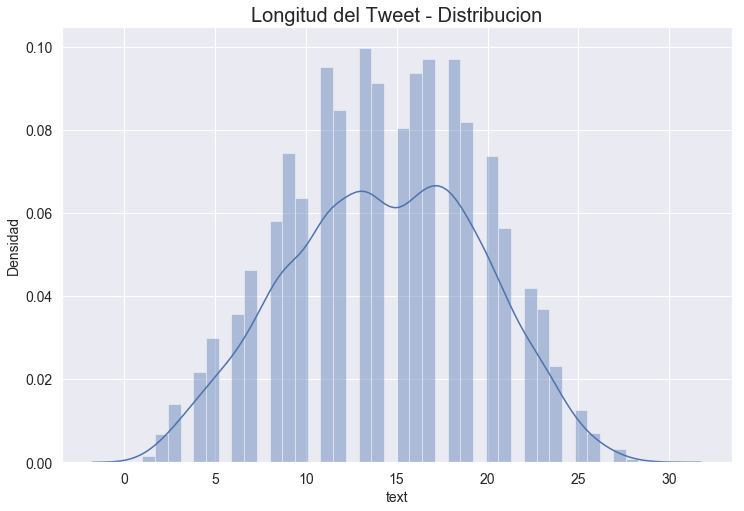

In [92]:
#Grafico la Distribucion - Opcion N°1

fig,(ax1) = plt.subplots(figsize=(12,8))

ax1.set_title('Longitud del Tweet - Distribucion',fontsize=20)
ax1.set_xlabel('Longitud',fontsize=14)
ax1.set_ylabel('Densidad',fontsize=14)
sns.distplot(largo_palabras_unicas)
plt.show()

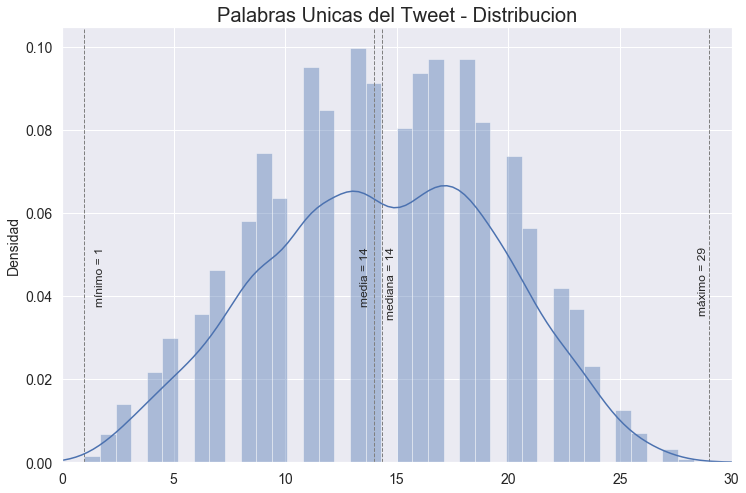

In [93]:
#Grafico la Distribucion - Opcion N°2

fig,ax1 = plt.subplots(figsize=(12,8))

min_len = largo_palabras_unicas.min()
mean_len = largo_palabras_unicas.mean()
median_len = largo_palabras_unicas.median()
max_len = largo_palabras_unicas.max()

ax1.axvline(mean_len, color='grey', linestyle='--', linewidth=1)
ax1.axvline(median_len, color='grey', linestyle='--', linewidth=1)
ax1.axvline(min_len, color='grey', linestyle='--', linewidth=1)
ax1.axvline(max_len, color='grey', linestyle='--', linewidth=1)

plt.text(min_len + 0.5 , ax1.get_ylim()[1]/20, 'mínimo = %d' %min_len, rotation = 90, fontsize = 12)
plt.text(mean_len - 1 , ax1.get_ylim()[1]/20, 'media = %d' %mean_len, rotation = 90, fontsize = 12)
plt.text(median_len + 0.5 , ax1.get_ylim()[1]/20, 'mediana = %d' %median_len, rotation = 90, fontsize = 12)
plt.text(max_len - 0.5 , ax1.get_ylim()[1]/20, 'máximo = %d' %max_len, rotation = 90, fontsize = 12)

ax1.set_title('Palabras Unicas del Tweet - Distribucion',fontsize=20)
ax1.set_ylabel('Densidad',fontsize=14)
ax1.set_xlim(0,30)
sns.distplot(largo_palabras_unicas.values)
plt.show()

A continuacion los 2 graficos anteriores los grafico en una sola figura para ver si existen diferencias

Text(0.5, 0, 'Cantidad de Palabras (n)')

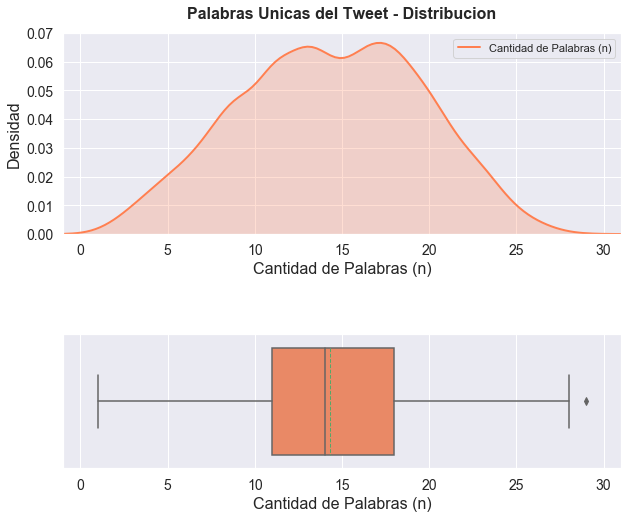

In [94]:
#Grafico la Distribucion - Opcion N°3

x_lim = largo_palabras_unicas.max()+2


fig = plt.figure(figsize=(10,8))

gs = GridSpec(2, 1, height_ratios=[6,4], hspace=0.6)


ax = plt.subplot(gs[0])

sns.distplot(largo_palabras_unicas, hist = False, kde = True, ax = ax, color = 'coral',
                 kde_kws = {'shade': True, 'linewidth': 2}, label = "Cantidad de Palabras (n)")

plt.xlim(-1, x_lim)
plt.ylabel('Densidad',fontsize=16)
plt.title('Palabras Unicas del Tweet - Distribucion',fontsize=16,fontweight='bold', pad = 15)
plt.xlabel("Cantidad de Palabras (n)",fontsize=16)
plt.legend()


ax1 = plt.subplot(gs[1])


sns.boxplot(largo_palabras_unicas, color='coral', ax=ax1, orient='h',meanline=True,showmeans=True)


plt.xlim(-1, x_lim)
plt.xlabel("Cantidad de Palabras (n)",fontsize=16)

In [95]:
estadisticos_df_1 = pd.DataFrame({'Cantidad de Palabras': largo_palabras.describe().round(1),'Cantidad de Palabras Unicas':largo_palabras_unicas.describe().round(1)})
estadisticos_df_1

,Cantidad de Palabras,Cantidad de Palabras Unicas
count,7613.0,7613.0
mean,14.9,14.3
std,5.7,5.3
min,1.0,1.0
25%,11.0,11.0
50%,15.0,14.0
75%,19.0,18.0
max,31.0,29.0


C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


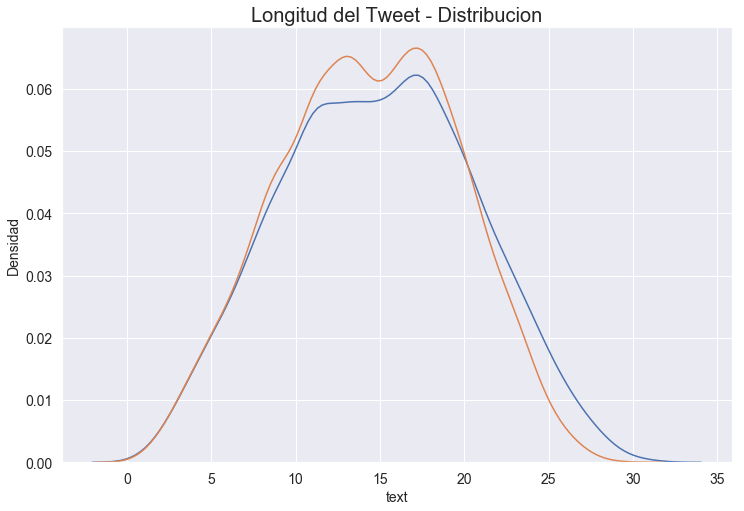

In [96]:
#Grafico la distribucion - Opcion N°1

fig,(ax1) = plt.subplots(figsize=(12,8))

ax1.set_title('Longitud del Tweet - Distribucion',fontsize=20)
ax1.set_xlabel('Longitud',fontsize=14)
ax1.set_ylabel('Densidad',fontsize=14)
sns.distplot(largo_palabras,hist=False)
sns.distplot(largo_palabras_unicas,hist=False)
plt.show()

### 4.4.4 Reconocimiento de Hashtags

In [97]:
import re

In [98]:
#Todo el texto de los tweets los llevo a minuscula
#Se observa en alguno de los tweet´s la presencia del simbolo # que representa el hashtag

col_4_new = dataset['text'].str.lower()
col_4_new.head()

0    our deeds are the reason of this #earthquake m...
1               forest fire near la ronge sask. canada
2    all residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    just got sent this photo from ruby #alaska as ...
Name: text, dtype: object

In [99]:
#De cada tweet me quedo con aquellas palabras que son hashtag

hashtags = col_4_new.map(lambda text: re.findall(r"#(\w+)", text))
hashtags.head()

0           [earthquake]
1                     []
2                     []
3            [wildfires]
4    [alaska, wildfires]
Name: text, dtype: object

In [100]:
#De cada tweet remuevo el simbolo # que representa a un hashtag

col_4_new = col_4_new.map(lambda text: text.replace('#', ''))

In [101]:
hashtags = pd.Series([tag for hashtags in hashtags for tag in hashtags])

In [102]:
#Cuento la cantidad de hashtags por tipo

hashtags.value_counts().head()

news          76
hot           31
prebreak      30
best          30
nowplaying    23
dtype: int64

### 4.4.5 Menciones en los Tweet´s 

In [103]:
menciones = dataset['text'].map(lambda text: re.findall(r"@(\w+)", text))
menciones.head()

0    []
1    []
2    []
3    []
4    []
Name: text, dtype: object

In [104]:
menciones = pd.Series([mention for mentionslist in menciones for mention in mentionslist]).value_counts()
menciones

YouTube            82
ArianaGrande       11
POTUS               9
Change              9
FoxNews             9
                   ..
calgaryfringe       1
gayler1969          1
DDNewsLive          1
MyVintageSoul       1
JohnFromCranber     1
Length: 2326, dtype: int64

In [105]:
menciones_df = pd.DataFrame({'Mencion':menciones.index,'Cantidad':menciones.values})
menciones_df.head()

,Mencion,Cantidad
0,YouTube,82
1,ArianaGrande,11
2,POTUS,9
3,Change,9
4,FoxNews,9


Text(0.5, 1.0, 'Análisis de Menciones más frecuentes')

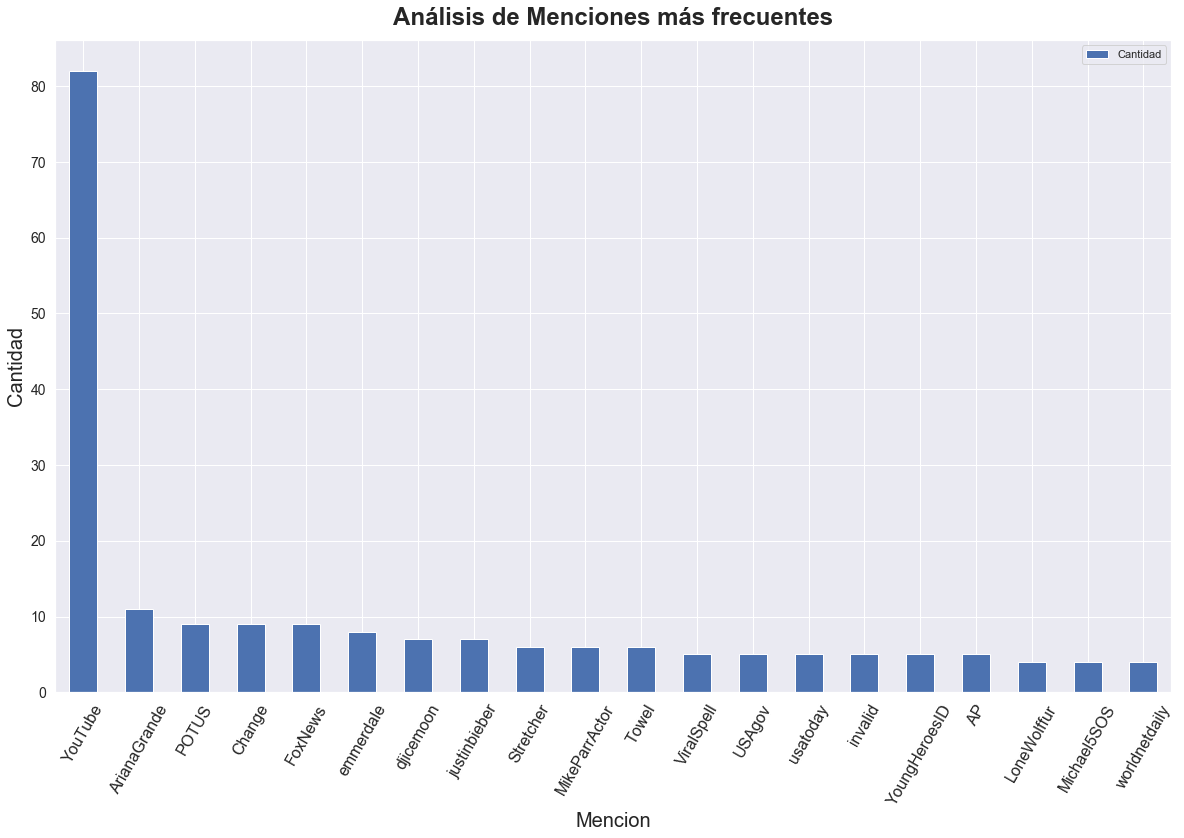

In [107]:
#Grafico las 20 primeras menciones

fig, ax = plt.subplots(figsize=(20,12))

menciones_df.nlargest(20,'Cantidad').plot(kind='bar', x = 'Mencion', ax = ax)

plt.xlabel("Mencion",fontsize=20)
plt.ylabel('Cantidad',fontsize=20)
plt.xticks(fontsize=16,rotation = 60) 
plt.title('Análisis de Menciones más frecuentes',fontsize=24,fontweight='bold', pad = 15)

## 4.5 Analisis de Columna N°5 `target`

La columna `target` corresponde a *in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)* 

In [108]:
#Valores de la columna

col_5 = dataset["target"]

In [110]:
#Cuento la cantidad

val_5 = col_5.value_counts()
val_5

0    4342
1    3271
Name: target, dtype: int64

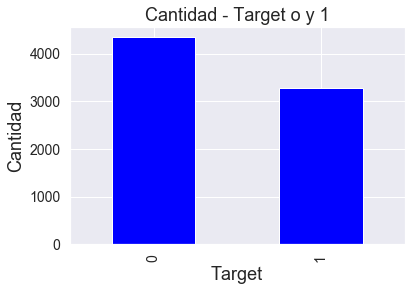

In [111]:
#Bar Plot orientativo de los datos disponibles

plt.title("Cantidad - Target o y 1")
plt.xlabel("Target")
plt.ylabel("Cantidad")
val_5.plot(kind='bar', figsize=(6,4),color="blue")
plt.show()

# 5. Analisis de Columnas en Conjunto 

## 5.0 Analisis columna 'keyword' y 'location'

Para este caso pretendo analizar alguna 'location' de las mas frecuentes identificadas en el item 4.3.2 Analisis de Lugares con mayor aparicion

In [112]:
booleano_1 = col_3.str.contains('USA') == True

In [114]:
dataset[booleano_1]['keyword'].value_counts()

sandstorm               18
destroyed                8
casualties               5
earthquake               5
volcano                  5
                        ..
derail                   1
casualty                 1
structural%20failure     1
famine                   1
chemical%20emergency     1
Name: keyword, Length: 129, dtype: int64

Text(0.5, 1.0, 'Keywords más frecuentes para ´location´ USA')

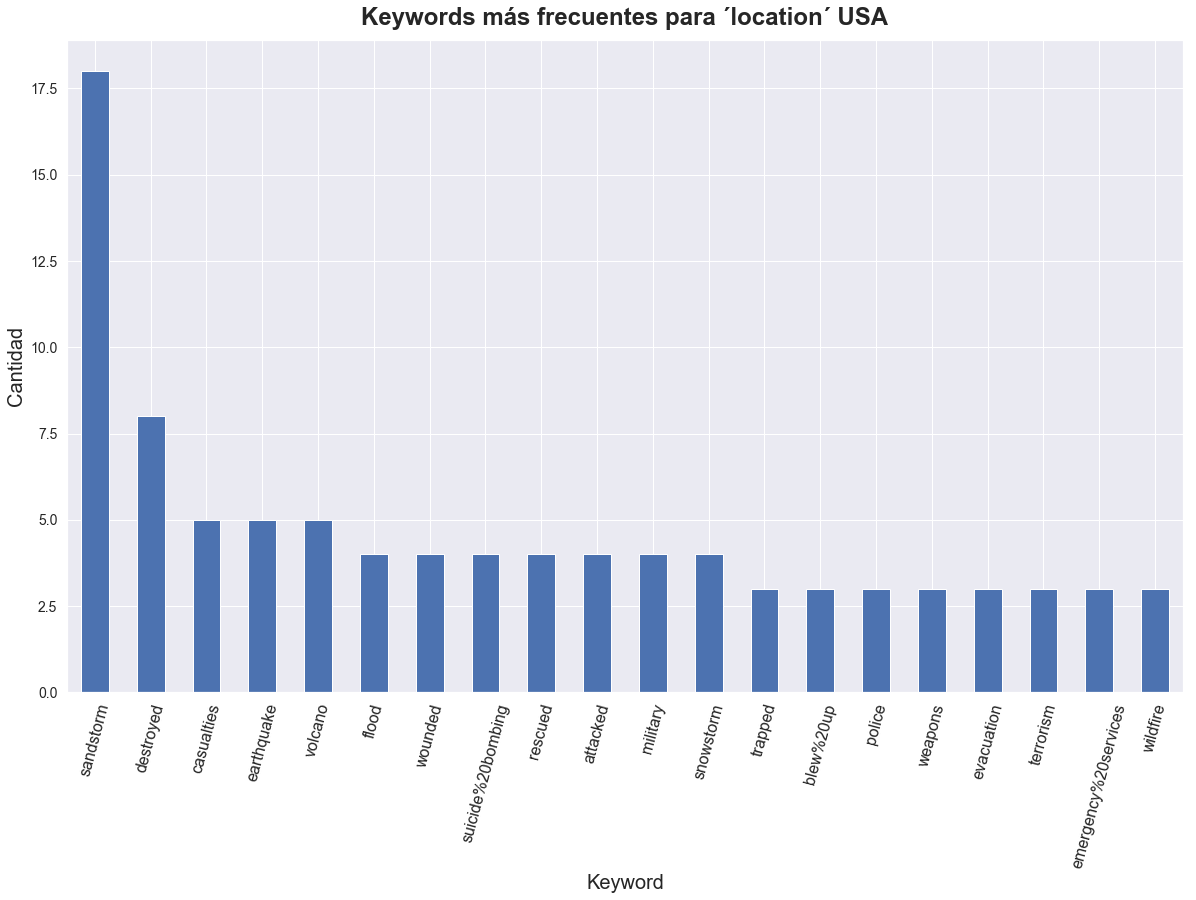

In [117]:
#Keywords mas frecuentes para location USA

fig, ax = plt.subplots(figsize=(20,12))

dataset[booleano_1]['keyword'].value_counts().head(20).plot(kind='bar',ax = ax)

plt.xlabel("Keyword",fontsize=20)
plt.ylabel('Cantidad',fontsize=20)
plt.xticks(fontsize=16,rotation = 75)
plt.title('Keywords más frecuentes para ´location´ USA',fontsize=24,fontweight='bold', pad = 15)

In [118]:
booleano_2 = col_3.str.contains('New York') == True

In [119]:
dataset[booleano_2]['keyword'].value_counts()

flood           13
body%20bag      10
army             4
explosion        4
detonation       4
                ..
heat%20wave      1
blew%20up        1
bioterrorism     1
cliff%20fall     1
destroyed        1
Name: keyword, Length: 75, dtype: int64

Text(0.5, 1.0, 'Keywords más frecuentes para ´location´ New York')

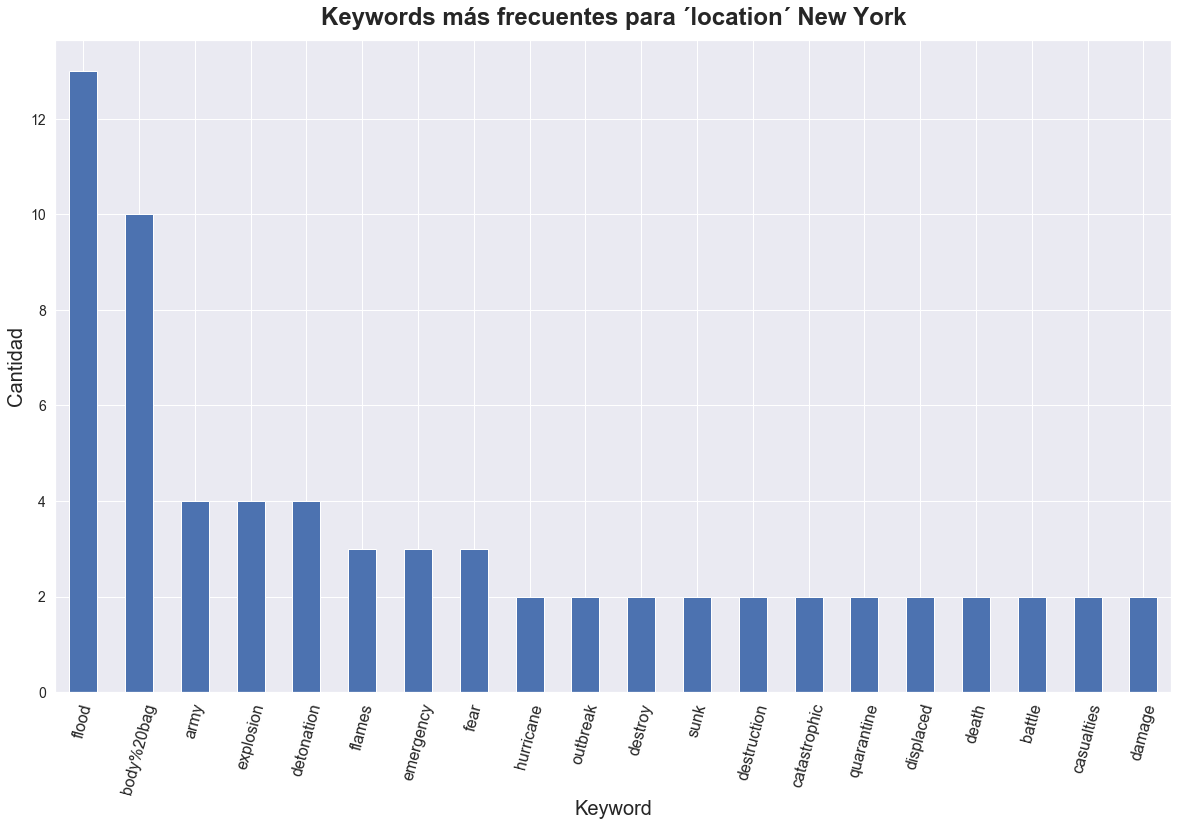

In [121]:
#Keywords mas frecuentes para location New York

fig, ax = plt.subplots(figsize=(20,12))

dataset[booleano_2]['keyword'].value_counts().head(20).plot(kind='bar',ax = ax)

plt.xlabel("Keyword",fontsize=20)
plt.ylabel('Cantidad',fontsize=20)
plt.xticks(fontsize=16,rotation = 75)
plt.title('Keywords más frecuentes para ´location´ New York',fontsize=24,fontweight='bold', pad = 15)

In [122]:
booleano_3 = col_3.str.contains('United States') == True

In [123]:
dataset[booleano_3]['keyword'].value_counts()

sandstorm               4
armageddon              4
hazardous               4
hail                    4
flood                   3
dead                    2
blizzard                2
wrecked                 2
survive                 2
wreck                   2
twister                 1
flames                  1
bioterror               1
thunderstorm            1
fire%20truck            1
catastrophic            1
annihilation            1
weapon                  1
eyewitness              1
fatalities              1
inundated               1
quarantine              1
outbreak                1
suicide%20bomber        1
devastation             1
rainstorm               1
evacuation              1
screams                 1
aftershock              1
explode                 1
rescued                 1
wounded                 1
wounds                  1
famine                  1
weapons                 1
bombing                 1
wild%20fires            1
drowned                 1
arsonist    

Text(0.5, 1.0, 'Keywords más frecuentes para ´location´ United States')

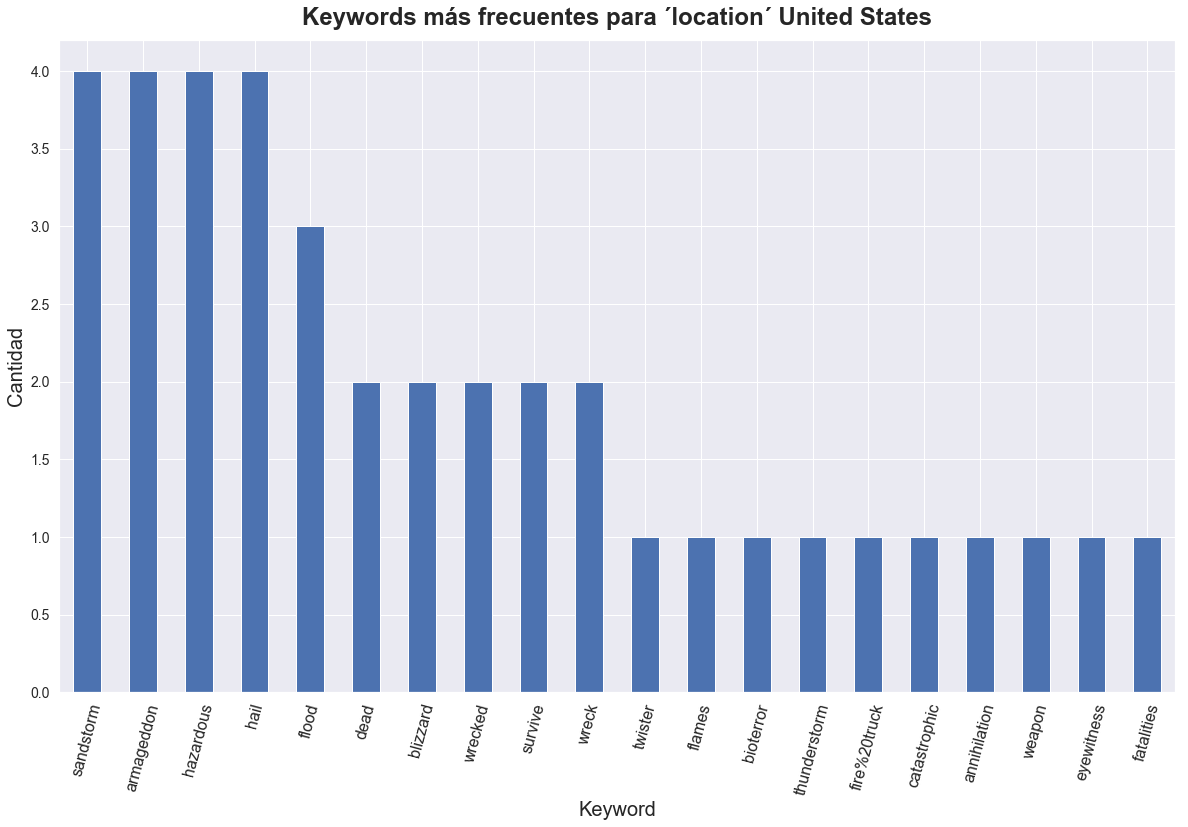

In [125]:
#Keywords mas frecuentes para location United States

fig, ax = plt.subplots(figsize=(20,12))

dataset[booleano_3]['keyword'].value_counts().head(20).plot(kind='bar',ax = ax)

plt.xlabel("Keyword",fontsize=20)
plt.ylabel('Cantidad',fontsize=20)
plt.xticks(fontsize=16,rotation = 75)
plt.title('Keywords más frecuentes para ´location´ United States',fontsize=24,fontweight='bold', pad = 15)

## 5.1 Analisis columna 'keyword' y 'target'

In [126]:
#Para Target 0 cuento las 'keyword' que mayor cantidad de veces aparecen

falso = dataset[dataset['target'] == 0]['keyword'].value_counts()
falso.head(20)

body%20bags    40
harm           37
armageddon     37
ruin           36
deluge         36
wrecked        36
twister        35
siren          35
explode        35
fear           35
screaming      34
aftershock     34
panic          34
traumatised    33
blazing        33
blizzard       33
sinking        33
crush          33
blaze          33
upheaval       32
Name: keyword, dtype: int64

In [127]:
#Para Target 1 cuento las 'keyword' que mayor cantidad de veces aparecen

verdadero = dataset[dataset['target'] == 1]['keyword'].value_counts()
verdadero.head(20)

outbreak               39
derailment             39
wreckage               39
typhoon                37
debris                 37
oil%20spill            37
evacuated              32
suicide%20bombing      32
suicide%20bomb         32
rescuers               32
nuclear%20disaster     31
razed                  31
airplane%20accident    30
suicide%20bomber       30
earthquake             30
bridge%20collapse      29
collision              29
wildfire               29
drought                28
mass%20murder          28
Name: keyword, dtype: int64

In [129]:
#Creo un DataFrame donde coloco los valores calculados anteriormente y la suma de ambos
#Ordeno por cantidad total en forma descendente

pd_new = pd.concat([falso,verdadero],axis=1)
pd_new.columns=['Falso','Verdadero']
pd_new = pd_new.fillna(value=0)
pd_new['Total'] = pd_new['Falso'] + pd_new['Verdadero']
pd_new = pd_new.sort_values(by='Total',ascending=False)
pd_new.head(20)

,Falso,Verdadero,Total
fatalities,19.0,26.0,45.0
armageddon,37.0,5.0,42.0
deluge,36.0,6.0,42.0
body%20bags,40.0,1.0,41.0
sinking,33.0,8.0,41.0
harm,37.0,4.0,41.0
damage,22.0,19.0,41.0
outbreak,1.0,39.0,40.0
collided,17.0,23.0,40.0
windstorm,24.0,16.0,40.0


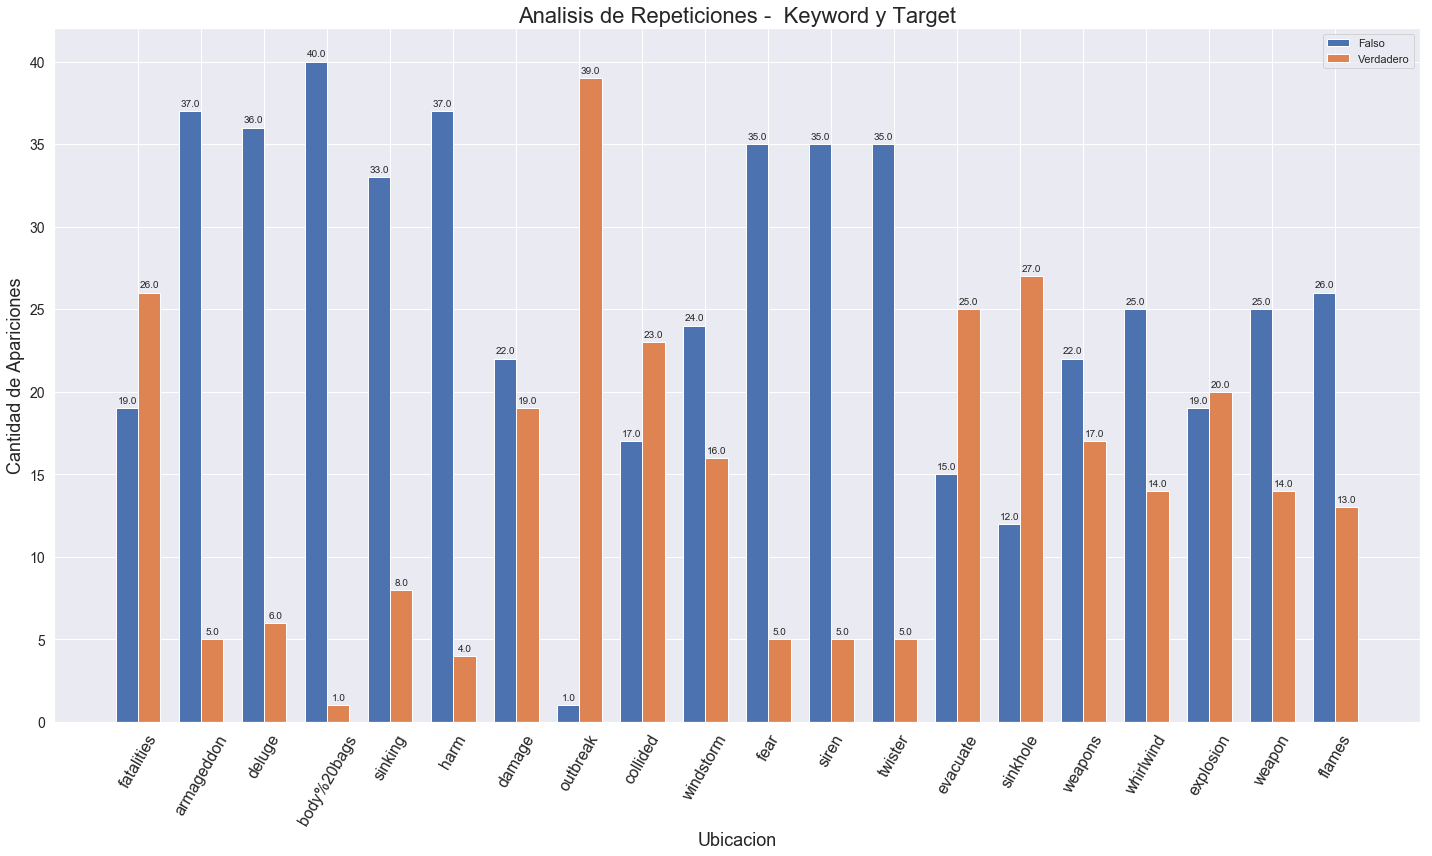

In [130]:
#Grafico los valores del DataFrame anterior

labels = pd_new.head(20).index
a = pd_new['Falso'].head(20)
b = pd_new['Verdadero'].head(20)

x = np.arange(len(labels)) 
width = 0.35

fig, ax = plt.subplots(figsize=(20,12))
rep1 = ax.bar(x - width/2, a, width, label='Falso')
rep2 = ax.bar(x + width/2, b, width, label='Verdadero')

ax.set_ylabel('Cantidad de Apariciones',fontsize=18)
ax.set_xlabel('Ubicacion',fontsize=18)
ax.set_title('Analisis de Repeticiones -  Keyword y Target',fontsize=22)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=16,rotation = 60)
ax.legend()


def etiquetado(rep):
    for i in rep:
        height = i.get_height()
        ax.annotate('{}'.format(height),
                    xy=(i.get_x() + i.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')


etiquetado(rep1)
etiquetado(rep2)

fig.tight_layout()

plt.show()

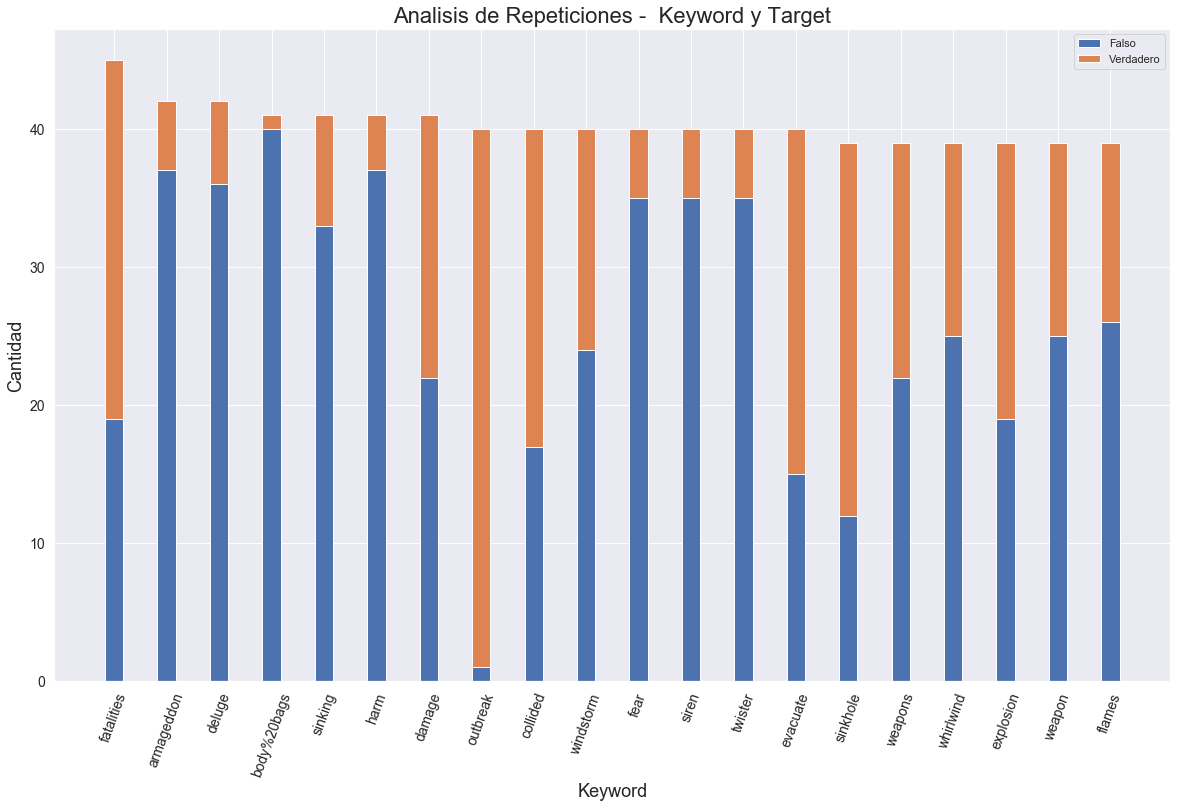

In [132]:
#Igual grafico anterior pero "stacked"

labels = pd_new.head(20).index
a = pd_new['Falso'].head(20)
b = pd_new['Verdadero'].head(20)
#repeticion_unica = col_3_sumas.head(20).values
#repeticion_en_frase = c['Cantidad de Apariciones']

x = np.arange(len(labels)) 


width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(20,12))

ax.bar(labels, a , width, label='Falso')
ax.bar(labels, b, width, a,label='Verdadero')

ax.set_ylabel('Cantidad',fontsize=18)
ax.set_xlabel('Keyword',fontsize=18)
ax.set_title('Analisis de Repeticiones -  Keyword y Target',fontsize=22)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=14,rotation = 70)

ax.legend()

plt.show()

## 5.2 Analisis columna 'text' con columna 'target'

### 5.2.1 Analisis del largo del tweet (caracteres) para Target 0 y 1

In [133]:
#Creo una nueva columna en el DataFrame donde agrego la longitud del tuit

dataset['longitud'] = dataset["text"].str.len()

In [134]:
#Me quedo con la porcion del DataFrame donde el Target es igual a 0

sub_df_0 = dataset[dataset['target'] == 0]
sub_df_0.head()

,id,keyword,location,text,target,longitud
15,23,NaN,NaN,What's up man?,0,14
16,24,NaN,NaN,I love fruits,0,13
17,25,NaN,NaN,Summer is lovely,0,16
18,26,NaN,NaN,My car is so fast,0,17
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0,28


In [135]:
#Me quedo con la porcion del DataFrame donde el Target es igual a 1

sub_df_1 = dataset[dataset['target'] == 1]
sub_df_1.head()

,id,keyword,location,text,target,longitud
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [136]:
#Genero un nuevo DataFrame que contenga los dos resumenes estadisticos para Target o y 1

estadisticos_1 = pd.DataFrame({'Target 0': sub_df_0['longitud'].describe(),'Target 1':sub_df_1['longitud'].describe()})
estadisticos_1

,Target 0,Target 1
count,4342.000000,3271.000000
mean,95.706817,108.113421
std,35.885924,29.309854
min,7.000000,14.000000
25%,68.000000,88.000000
50%,101.000000,115.000000
75%,130.000000,136.000000
max,157.000000,151.000000


C:\Users\Usuario\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Usuario\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


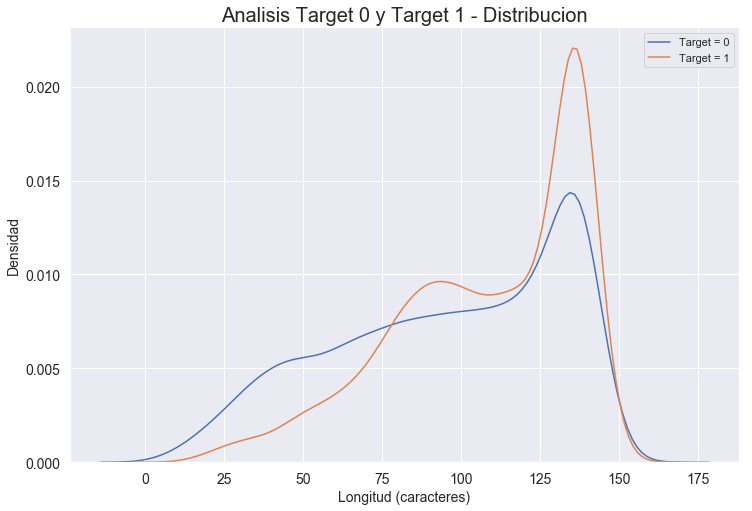

In [137]:
#Grafico las distribuciones para Target 0 y 1 - Grafico KDE

datos = pd.DataFrame({'Target = 0':sub_df_0['longitud'],'Target = 1':sub_df_1['longitud']})

fig,(ax1) = plt.subplots(figsize=(12,8))
ax1.set_title('Analisis Target 0 y Target 1 - Distribucion',fontsize=20)
ax1.set_xlabel('Longitud (caracteres)',fontsize=14)
ax1.set_ylabel('Densidad',fontsize=14)
sns.kdeplot(datos['Target = 0'])
sns.kdeplot(datos['Target = 1'])
plt.show()

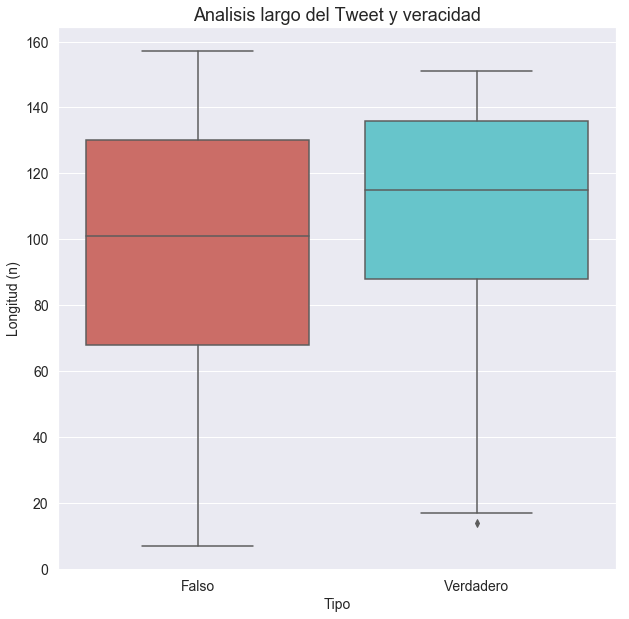

In [138]:
#Grafico las barplot para Target 0 y 1

datos = pd.DataFrame({'Falso':sub_df_0['longitud'],'Verdadero':sub_df_1['longitud']})

fig,(ax1) = plt.subplots(figsize=(10,10))
ax1.set_title('Analisis largo del Tweet y veracidad',fontsize=18)
ax1.set_ylabel('Longitud (n)',fontsize=14)
ax1.set_xlabel('Tipo',fontsize=14)
sns.boxplot(data=datos,palette="hls",whis=1.5)
plt.show()

Text(0.5, 0, 'Cantidad de caracteres(n)')

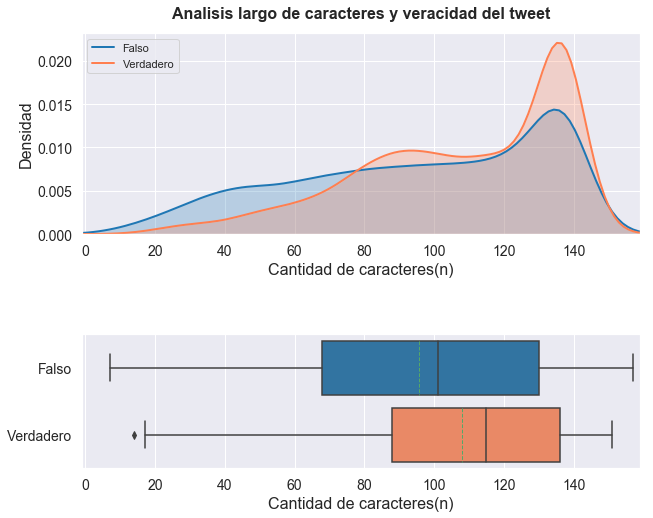

In [139]:
#Grafico las distribuciones para Target 0 y 1 - Opcion Final

x_lim = datos['Falso'].max()+2

fig = plt.figure(figsize=(10,8))

gs = GridSpec(2, 1, height_ratios=[6,4], hspace=0.6)

datos = pd.DataFrame({'Falso':sub_df_0['longitud'],'Verdadero':sub_df_1['longitud']})

ax = plt.subplot(gs[0])

sns.distplot(datos['Falso'], hist = False, kde = True, ax = ax, color = '#1f77b4',kde_kws = {'shade': True, 'linewidth': 2}, label = 'Falso')
sns.distplot(datos['Verdadero'], hist = False, kde = True, ax = ax, color = 'coral', kde_kws = {'shade': True, 'linewidth': 2}, label = 'Verdadero')

plt.xlim(-1, x_lim)
plt.ylabel('Densidad',fontsize=16)
plt.title('Analisis largo de caracteres y veracidad del tweet',fontsize=16,fontweight='bold', pad = 15)
plt.xlabel('Cantidad de caracteres(n)',fontsize=16)
plt.legend()


ax1 = plt.subplot(gs[1])


data = datos.loc[:,['Falso','Verdadero']]

colors = ('#1f77b4' , 'coral')
sns.boxplot(data=data, palette=colors, ax=ax1, orient='h',meanline=True, showmeans=True)


plt.xlim(-1, x_lim)
plt.xlabel('Cantidad de caracteres(n)',fontsize=16)

### 5.2.2 Analisis del largo del tweet (palabras) para Target 0 y 1 

In [140]:
#Visualizo los 5 primeros tweets que tienen Target 0

dataset[dataset['target']==0]['text'].head()

15                  What's up man?
16                   I love fruits
17                Summer is lovely
18               My car is so fast
19    What a goooooooaaaaaal!!!!!!
Name: text, dtype: object

In [141]:
#Para cada tweet que tiene Target 0 cuento la cantidad de palabras

largo_palabras_0 = dataset[dataset['target']==0]['text'].str.split().map(lambda x: len(x))
largo_palabras_0.head()

15    3
16    3
17    3
18    5
19    3
Name: text, dtype: int64

In [142]:
#Visualizo los 5 primeros tweets que tienen Target 1

dataset[dataset['target']==1]['text'].head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [143]:
#Para cada tweet que tiene Target 1 cuento la cantidad de palabras

largo_palabras_1 = dataset[dataset['target']==1]['text'].str.split().map(lambda x: len(x))
largo_palabras_1.head()

0    13
1     7
2    22
3     8
4    16
Name: text, dtype: int64

In [144]:
#Genero un nuevo DataFrame que contenga los dos resumenes estadisticos para Target o y 1

estadisticos_2 = pd.DataFrame({'Target 0': largo_palabras_0.describe(),'Target 1':largo_palabras_1.describe()})
estadisticos_2

,Target 0,Target 1
count,4342.000000,3271.000000
mean,14.704744,15.167533
std,6.161564,5.096806
min,1.000000,2.000000
25%,10.000000,11.000000
50%,15.000000,15.000000
75%,19.000000,19.000000
max,31.000000,30.000000


C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


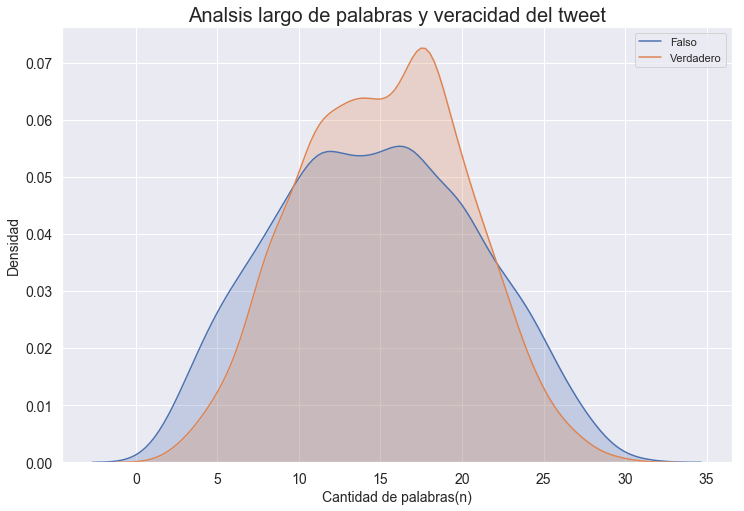

In [145]:
#Grafico las distribuciones para Target 0 y 1 - Opcion N°1

fig,(ax1) = plt.subplots(figsize=(12,8))

ax1.set_title('Analsis largo de palabras y veracidad del tweet',fontsize=20)
ax1.set_xlabel('Cantidad de palabras(n)',fontsize=14)
ax1.set_ylabel('Densidad',fontsize=14)
sns.kdeplot(largo_palabras_0,shade=True,label = 'Falso')
sns.kdeplot(largo_palabras_1,shade=True,label = 'Verdadero')
plt.show()

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Cantidad de palabras(n)')

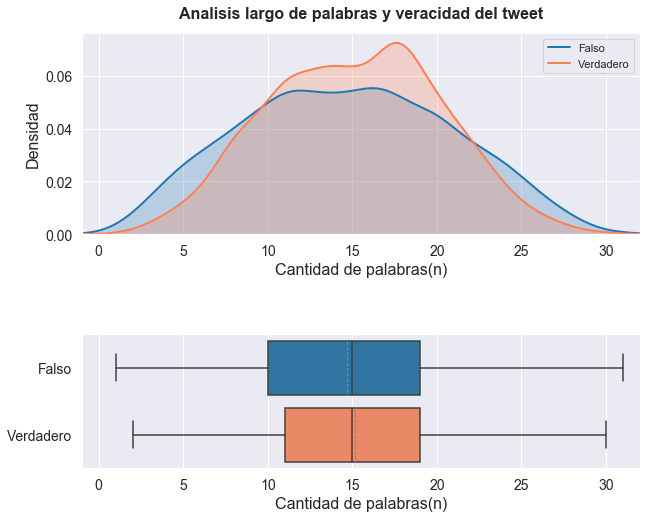

In [151]:
#Grafico las distribuciones para Target 0 y 1 - Opcion Final

x_lim = largo_palabras_1.max()+2

fig = plt.figure(figsize=(10,8))

gs = GridSpec(2, 1, height_ratios=[6,4], hspace=0.6)


ax = plt.subplot(gs[0])

sns.distplot(largo_palabras_0, hist = False, kde = True, ax = ax, color = '#1f77b4',kde_kws = {'shade': True, 'linewidth': 2}, label = 'Falso')
sns.distplot(largo_palabras_1, hist = False, kde = True, ax = ax, color = 'coral',kde_kws = {'shade': True, 'linewidth': 2}, label = 'Verdadero')

plt.xlim(-1, x_lim)
plt.ylabel('Densidad',fontsize=16)
plt.title('Analisis largo de palabras y veracidad del tweet',fontsize=16,fontweight='bold', pad = 15)
plt.xlabel('Cantidad de palabras(n)',fontsize=16)
plt.legend()


ax1 = plt.subplot(gs[1])

datos=pd.DataFrame({'Falso':largo_palabras_0,'Verdadero':largo_palabras_1})
data = datos.loc[:,['Falso','Verdadero']]

colors = ('#1f77b4' , 'coral')
sns.boxplot(data=data, palette=colors, ax=ax1, orient='h',meanline=True, showmeans=True)


plt.xlim(-1, x_lim)
plt.xlabel('Cantidad de palabras(n)',fontsize=16)

### 5.2.3 Analisis del largo promedio  de caractsteres en las palabras de cada tweet para Target 0 y 1 

In [153]:
dataset['text'].head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [154]:
palabras_2=dataset[dataset['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
palabras_2.head()

0             [3, 5, 3, 3, 6, 2, 4, 11, 3, 5, 7, 2, 3]
1                                [6, 4, 4, 2, 5, 5, 6]
2    [3, 9, 5, 2, 8, 2, 6, 3, 5, 8, 2, 9, 2, 5, 10,...
3                          [6, 6, 7, 10, 10, 6, 2, 10]
4    [4, 3, 4, 4, 5, 4, 4, 7, 2, 5, 4, 10, 5, 4, 1, 6]
Name: text, dtype: object

In [155]:
palabras_3=dataset[dataset['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
palabras_3.head()

15          [6, 2, 4]
16          [1, 4, 6]
17          [6, 2, 6]
18    [2, 3, 2, 2, 4]
19         [4, 1, 21]
Name: text, dtype: object

In [156]:
verdadero = palabras_2.map(lambda x: np.mean(x))
verdadero.head()

0    4.384615
1    4.571429
2    5.090909
3    7.125000
4    4.500000
Name: text, dtype: float64

In [157]:
falso = palabras_3.map(lambda x: np.mean(x))
falso.head()

15    4.000000
16    3.666667
17    4.666667
18    2.600000
19    8.666667
Name: text, dtype: float64

Text(0.5, 0, 'Promedio de caracteres por palabra(n)')

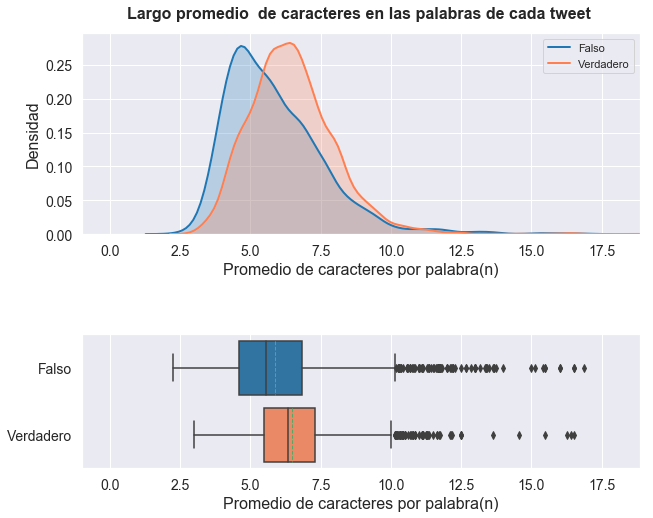

In [164]:
#Grafico las distribuciones para Target 0 y 1 - Opcion Final

x_lim = falso.max()+2

fig = plt.figure(figsize=(10,8))

gs = GridSpec(2, 1, height_ratios=[6,4], hspace=0.6)


ax = plt.subplot(gs[0])

sns.distplot(falso, hist = False, kde = True, ax = ax, color = '#1f77b4',kde_kws = {'shade': True, 'linewidth': 2}, label = 'Falso')
sns.distplot(verdadero, hist = False, kde = True, ax = ax, color = 'coral',kde_kws = {'shade': True, 'linewidth': 2}, label = 'Verdadero')

plt.xlim(-1, x_lim)
plt.ylabel('Densidad',fontsize=16)
plt.title('Largo promedio  de caracteres en las palabras de cada tweet ',fontsize=16,fontweight='bold', pad = 15)
plt.xlabel('Promedio de caracteres por palabra(n)',fontsize=16)
plt.legend()


ax1 = plt.subplot(gs[1])

datos=pd.DataFrame({'Falso':falso,'Verdadero':verdadero})
data = datos.loc[:,['Falso','Verdadero']]

colors = ('#1f77b4' , 'coral')
sns.boxplot(data=data, palette=colors, ax=ax1, orient='h',meanline=True, showmeans=True)


plt.xlim(-1, x_lim)
plt.xlabel('Promedio de caracteres por palabra(n)',fontsize=16)